## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Поэтому нужно разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.<br>

Подход к решению задачи:<br>
1.	Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2.	Нужно собрать данные по клиентам по следующим группам: 
   * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
   * Признаки, которые описывают продуктовое поведение покупателя (какие товары покупает и как часто).
   * Признаки, которые описывают покупательское поведение клиента (сколько тратил в магазине).
   * Признаки, которые описывают поведение покупателя на сайте (как много страниц просматривает и сколько времени проводит на сайте).
3.	Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4.	В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5.	Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.<br>

**Описание данных**
Данные для работы находятся в 4-х таблицах.<br>

1. `market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.<br>
   * `id` — номер покупателя в корпоративной базе данных.
   * <font color='red'>`Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».</font>
   * `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.
   * `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
   * `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
   * `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
   * `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
   * `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
   * `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
   * `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
   * `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
   * `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
   * `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>


2. `market_money.csv` - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.<br>
   * `id` — номер покупателя в корпоративной базе данных.
   * `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
   * `Выручка` — сумма выручки за период в условных единицах.<br>


3. `market_time.csv` - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.<br>
   * `id — номер покупателя в корпоративной базе данных.
   * `Период` — название периода, во время которого зафиксировано общее время.
   * `минут` — значение времени, проведённого на сайте, в минутах.<br>


4. `money.csv` - данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.<br>
   * `id` — номер покупателя в корпоративной базе данных.
   * `Прибыль` — значение прибыли в условных единицах.<br>

## Загрузка данных

*Примечание: Тут пришлось немного добавить кода с обновлением библиотек, чтобы устранить ошибки и выполнялась совместимость библиотек. Также чуть ниже закомитил код, который устранял ошибки с библиотеками, поэтому его оставил на всякий случай.*

In [1]:
# Установка библиотек необходимых для работы кода
!pip install -U scikit-learn -q
!pip install numpy==1.22.4 pandas==1.5.1 -q
!pip install -U phik -q
!pip install -U shap -q
!pip install matplotlib==3.5 -q
#pip install -U scipy -q
#!pip install -U seaborn

In [2]:
# Импорт библиотек для работы с данными и визуализации
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
import shap
import time

# Импорт функций из sklearn для преобразования данных и для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
# from sklearn.feature_selection import SelectKBest

# Импорт моделей из sklearn для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Импорт метрик
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score
)

In [3]:
# Определяем константы
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [4]:
# Ссылки на датасеты с данными (на сервере)
pth1_serv = '/datasets/market_file.csv' # поведение покупателей на сайте
pth2_serv = '/datasets/market_money.csv' # выручка по каждому покупателю
pth3_serv = '/datasets/market_time.csv' # время проведенное покупателями на сайте
pth4_serv = '/datasets/money.csv' # прибыль за 3 месяца от продаж каждому покупателю

# Ссылки на датасеты с данными (в текущей директории)
pth1_curr = 'datasets/market_file.csv'
pth2_curr= 'datasets/market_money.csv'
pth3_curr = 'datasets/market_time.csv'
pth4_curr = 'datasets/money.csv'

# Проверяем каждый файл отдельно
if os.path.exists(pth1_serv) and os.path.exists(pth2_serv) and os.path.exists(pth3_serv) and os.path.exists(pth4_serv):
    market_file = pd.read_csv(pth1_serv, sep=',')
    market_money = pd.read_csv(pth2_serv, sep=',')
    market_time = pd.read_csv(pth3_serv, sep=',')
    money = pd.read_csv(pth4_serv, sep=';', decimal = ',')
    print("Файлы загружены с сервера")
    
elif os.path.exists(pth1_curr) and os.path.exists(pth2_curr) and os.path.exists(pth3_curr) and os.path.exists(pth4_curr):
    market_file = pd.read_csv(pth1_curr, sep=',')
    market_money = pd.read_csv(pth2_curr, sep=',')
    market_time = pd.read_csv(pth3_curr, sep=',')
    money = pd.read_csv(pth4_curr, sep=';', decimal = ',')
    print("Файлы загружены из текущей директории")
    
else:
    print('Ошибка: файлы не найдены')
    print(f"Текущая директория: {os.getcwd()}")

Файлы загружены с сервера


In [5]:
# установим отображение всех столбцов
pd.set_option('display.max_columns', None)

Проверим результат загрузки каждого датафрейма выводом нескольких строк.

In [6]:
# проверка содержания датасета
market_file.head(2)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5


In [7]:
# проверка содержания датасета
market_money.head(2)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1


In [8]:
# проверка содержания датасета
market_time.head(2)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13


In [9]:
# проверка содержания датасета
money.head(2)

,id,Прибыль
0,215348,0.98
1,215349,4.16


Датасеты загрузились правильно, значения данных соответствуют условиям задания. Во всех датасетах наименования столбцов оформлены на русском языке. Переведем в каждом датафрейме все названия на английский язык и оформим их в виде `snake_case` в соответствии со стандартом PEP 8. И после переименования столбцов сразу посмотрим общую информацию о каждом датафрейме.

In [10]:
# переименум столбцы в market_fil
market_file.columns = ['id', 'activity', 'service_type', 'promo_agreement', 'market_activ_6m',
                      'market_activ_cur', 'duration', 'promo_purchases', 'pop_category',
                      'view_category_avg', 'unpaid_goos_quarter', 'error_service', 'pages_per_visit']

In [11]:
# переименум столбцы в market_money
market_money.columns = ['id', 'period_rev', 'revenue']

In [12]:
# переименум столбцы в market_time
market_time.columns = ['id', 'period_time', 'minutes']

In [13]:
# переименум столбцы в money
money.columns = ['id', 'profit']

Новое наименование признаков в датафрейме `market_file` - данные о коммуникациях и поведении покупателей на сайте:<br>
* `id` — номер покупателя в корпоративной базе данных.
* <font color='red'>`activity` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».</font>
* `service_type` — уровень сервиса в зависимости от наличия определенной подписки у пользователя (*«премиум» и «стандарт»*).
* `promo_agreement` — информация о наличии согласия покупателя на рассылку ему дополнительных предложений о товаре.
* `market_activ_6m` — среднемесячное значение маркетинговых коммуникаций с покупателем за последние 6 месяцев (число рассылок, звонков, показов рекламы и прочего на клиента).
* `market_activ_cur` — количество маркетинговых коммуникаций в текущем месяце.
* `duration` — сколько дней прошло с момента регистрации покупателя на сайте.
* `promo_purchases` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* `pop_category` — самая популярная категория товаров у покупателя за последние 6 месяцев.
* `view_category_avg` — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `unpaid_goos_quarter` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `error_service` — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
* `pages_per_visit` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.<br>

Новое наименование признаков в датафрейме `market_money` - данные о выручке по каждому покупателю за последние 3 месяца:<br>
* `id` — номер покупателя в корпоративной базе данных.
* `period_rev` — периода, во время которого зафиксирована выручка (*'текущий_месяц', 'предыдущий_месяц', 'препредыдущий_месяц'*).
* `revenue` — сумма выручки за период в условных единицах.<br>

Новое наименование признаков в датафрейме `market_time` - данные о времени проведенном покупателями на сайте за последние 2 месяца:<br>
* `id` — номер покупателя в корпоративной базе данных.
* `period_time` — название периода, во время которого зафиксировано общее время (*'текущий_месяц', 'предыдущий_месяц'*).
* `minutes` — значение времени, проведённого на сайте, в минутах.<br>

Новое наименование признаков в датафрейме `money` - данные о прибыли за 3 месяца от продаж каждому покупателю:<br>
* `id` — номер покупателя в корпоративной базе данных.
* `profit` — значение прибыли в условных единицах.<br>

Выведем общую информацию о датафрейме `market_file`

In [14]:
# вывод информации о датафрейме
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1300 non-null   int64  
 1   activity             1300 non-null   object 
 2   service_type         1300 non-null   object 
 3   promo_agreement      1300 non-null   object 
 4   market_activ_6m      1300 non-null   float64
 5   market_activ_cur     1300 non-null   int64  
 6   duration             1300 non-null   int64  
 7   promo_purchases      1300 non-null   float64
 8   pop_category         1300 non-null   object 
 9   view_category_avg    1300 non-null   int64  
 10  unpaid_goos_quarter  1300 non-null   int64  
 11  error_service        1300 non-null   int64  
 12  pages_per_visit      1300 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 132.2+ KB


Выведем общую информацию о датафрейме `market_money`

In [15]:
# вывод информации о датафрейме
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3900 non-null   int64  
 1   period_rev  3900 non-null   object 
 2   revenue     3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Выведем общую информацию о датафрейме `market_time`

In [16]:
# вывод информации о датафрейме
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           2600 non-null   int64 
 1   period_time  2600 non-null   object
 2   minutes      2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Выведем общую информацию о датафрейме `money`

In [17]:
# вывод информации о датафрейме
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1300 non-null   int64  
 1   profit  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Вывод по разделу 2**<br>
Все данные загружены без ошибок. Данные и их формат соответствуют описанию. Наименования столбцов были переведены на английский язык и приведены к виду snake_case в соответствии со стандартом PEP 8.<br>

* Датафрейм `market_file` содержит 1300 строк (данные о 1300 покупателях), явных пропусков нет. Все количественные признаки имеют соответсвующий формат `int64` или `float64`. Лишних знаков после точки нет, данные удобны для чтения.<br>
* Датафрейм `market_money` содержит 3900 строк (данные о выручке по каждому покупателю за последние 3 месяца помесячно), при этом данные о выручке по каждому месяцу хранятся в одном столбце. Явных пропусков нет. Признак `revenue` имеет соответсвующий формат `float64`.<br>
* Датафрейм `market_time` содержит 2600 строк (данные о времени, проведенном покупателем на сайте за последние 2 месяца), при этом данные о времени по каждому месяцу хранятся в одном столбце. Явных пропусков нет. Признак `minutes` имеет целочисленный формат `int64`.<br>
* Датафрейм `money` содержит 1300 строк (данные о выручке с каждого клиента сводно за последние 3 месяца ). Явных пропусков нет. Признак `profit` имеет соответсвующий формат `float64`.<br>

##  Предобработка данных

Проведем поиск неявных дубликатов в категориальных признаках. Создадим для этого функцию, которая будет выводить все уникальные значения категориальных признаков в датафрейме.

In [18]:
# функция выводит и считает уникальные значения категориальных признаков в датафрейме 
def count_unique(df):
    for column in df.select_dtypes(include=['object']).columns:
        print('\033[1m' + f"Распределение значений в столбце '{column}':" + '\033[0m')
        print(df[column].value_counts().to_string())  # Убирает 'Name' и 'dtype'
        print()  # Пустая строка для разделения
    print('='*50)

In [19]:
# выведем уникальные значения категориальных признаков
count_unique(market_file)

Распределение значений в столбце 'activity':
Прежний уровень    802
Снизилась          498

Распределение значений в столбце 'service_type':
стандарт     914
премиум      376
стандартт     10

Распределение значений в столбце 'promo_agreement':
да     962
нет    338

Распределение значений в столбце 'pop_category':
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138



In [20]:
# выведем уникальные значения категориальных признаков
count_unique(market_money)

Распределение значений в столбце 'period_rev':
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300



In [21]:
# выведем уникальные значения категориальных признаков
count_unique(market_time)

Распределение значений в столбце 'period_time':
текущий_месяц       1300
предыдцщий_месяц    1300



* В датасете `market_file` в признаке `service_type` есть неявные дубликаты - ошибочное написание значения "стандартт". Заменим его на значение "стандарт".
* В датасете `market_file` в признаке `pop_category` в значении "Косметика и аксесуары" есть орфографическая ошибка. Заменим на верное значение "Косметика и аксессуары".
* В датасете `market_time` в признаке `period_time` в значении "предыдцщий_месяц" есть орфографическая ошибка. Заменим на верное значение "предыдущий_месяц".

In [22]:
# обработаем значения в столбце 'service_type'
market_file['service_type'] = (market_file['service_type']
                         .str.replace('стандартт', 'стандарт') # заменяем неявные дубликаты
                        )

# обработаем значения в столбце 'pop_category'
market_file['pop_category'] = (market_file['pop_category']
                         .str.replace('Косметика и аксесуары', 'Косметика и аксессуары') # исправляем орфографические ошибки
                        )

# обработаем значения в столбце 'pop_category'
market_time['period_time'] = (market_time['period_time']
                         .str.replace('предыдцщий_месяц', 'предыдущий_месяц') # исправляем орфографические ошибки
                        )

In [23]:
# Проверим рузультат обработки
market_file['service_type'].value_counts()

стандарт    924
премиум     376
Name: service_type, dtype: int64

In [24]:
# Проверим рузультат обработки
market_file['pop_category'].value_counts()

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксессуары                  223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: pop_category, dtype: int64

In [25]:
# Проверим рузультат обработки
market_time['period_time'].value_counts()

текущий_месяц       1300
предыдущий_месяц    1300
Name: period_time, dtype: int64

___

Проверим наличие строк дубликатов в датафреймах.

In [26]:
# Проверим строки дубликаты в 'market_fil'
print("Количество дубликатов в 'market_file':", market_file.duplicated().sum())
print("Количество дубликатов в 'market_money':", market_money.duplicated().sum())
print("Количество дубликатов в 'market_time':", market_time.duplicated().sum())
print("Количество дубликатов в 'money':", money.duplicated().sum())

Количество дубликатов в 'market_file': 0
Количество дубликатов в 'market_money': 0
Количество дубликатов в 'market_time': 0
Количество дубликатов в 'money': 0


Явных строк-дубликатов не обнаружено.
___

Поле с номером покупателя 'id' должно быть уникальным в каждом датафрейме. Проверим сколько уникальных значений в поле 'id' в датафрейме `market_file`.

In [27]:
# Проверяем количество уникальных номеров покупателей
market_file['id'].nunique()

1300

Проверим сколько уникальных значений в поле 'id' в датафрейме `market_money`. В данном датафрейме хранится о выручке с каждого покупателя за последние 3 месяца помесячно, при этом данные по каждому месяцу хранятся в одном столбце. Поэтому посчитаем количество уникальных значений в поле 'id' по каждому месяцу, чтобы предупредить возможные ошибки при объединении таблиц.

In [28]:
# Проверяем количество уникальных номеров покупателей
print("Количество уникальных id (по значению - 'препредыдущий_месяц'):",
      market_money.query("period_rev == 'препредыдущий_месяц'")['id'].nunique())
print("Количество уникальных id (по значению - 'предыдущий_месяц'):",
      market_money.query("period_rev == 'предыдущий_месяц'")['id'].nunique())
print("Количество уникальных id (по значению - 'текущий_месяц'):",
      market_money.query("period_rev == 'текущий_месяц'")['id'].nunique())

Количество уникальных id (по значению - 'препредыдущий_месяц'): 1300
Количество уникальных id (по значению - 'предыдущий_месяц'): 1300
Количество уникальных id (по значению - 'текущий_месяц'): 1300


Проверим сколько уникальных значений в поле 'id' в датафрейме `market_time` по каждому месяцу.

In [29]:
# Проверяем количество уникальных номеров покупателей
print("Количество уникальных id (по значению - 'предыдущий_месяц'):",
      market_time.query("period_time == 'предыдущий_месяц'")['id'].nunique())
print("Количество уникальных id (по значению - 'текущий_месяц'):",
      market_time.query("period_time == 'текущий_месяц'")['id'].nunique())

Количество уникальных id (по значению - 'предыдущий_месяц'): 1300
Количество уникальных id (по значению - 'текущий_месяц'): 1300


В датафрейме `money` данные о выручке с каждого клиента хранятся сводно за последние 3 месяца, поэтому просто проверим укальные значения `id` во всей таблице. 

In [30]:
# Проверяем количество уникальных номеров покупателей
money['id'].nunique()

1300

**Вывод по разделу 3**<br>
* Во всех датафреймах поле с номером кпокупателя `id` уникально, дубликатов не выявлено.
* В датафрейме `market_file` в столбце `service_type` были обнаружены и обработаны неявные дубликаты: ошибочные значения названия категории "стандартт". Высего было обработано 10 таких строк. В остальных датафреймах дубликатов не обнаружено.
* Были исправлены орфографические ошибки в наименовании категорий.
* Все данные принадлежат к соответствующему типу.
* Пропущенных значений не обнаружено.<br>

Поиск аномальных значений в количественных признаках выполним в процессе исследовательского анализа данных.

## Исследовательский анализ данных

Перед началом исследовательского анализа напишем функцию, которая будет строить графики распределения и диаграммы размаха для количественных признаков.

In [31]:
def plot_distribution_and_boxplot(df):
    """
    Строит графики распределения и диаграммы размаха для количественных признаков DataFrame.
    Parameters:
    df (pd.DataFrame): Входной DataFrame для анализа
    """
    # Автоматически определяем количественные признаки (числовые столбцы)
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    if not numeric_columns:
        print("В DataFrame нет числовых столбцов для построения графиков.")
        return
    
    print(f"Найдено количественных признаков: {len(numeric_columns)}")
    print(f"Признаки: {numeric_columns}")
    
    # Автоматически определяем размер фигуры в зависимости от количества признаков
    n_columns = len(numeric_columns)
    fig_width = 15
    fig_height = 4 * n_columns  # высота зависит от количества признаков

    # Создаем фигуру с автоматически рассчитанным размером
    fig = plt.figure(figsize=(fig_width, fig_height))

    for i, col in enumerate(numeric_columns, 1):
        # Первый график - гистограмма для непрерывных данных
        ax1 = fig.add_subplot(n_columns, 2, 2*i-1)
        
        # Проверяем количество уникальных значений для выбора типа графика
        n_unique = df[col].nunique()
        
        if n_unique <= 20:  # Если мало уникальных значений - столбчатая диаграмма
            counts = df[col].value_counts().sort_index()
            bars = ax1.bar(range(len(counts)), counts.values, edgecolor='black')
            ax1.set_xticks(range(len(counts)))
            ax1.set_xticklabels(counts.index)
            
            # Добавляем подписи значений над столбцами
            for bar in bars:
                height = bar.get_height()
                ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                        f'{int(height)}', ha='center', va='bottom', fontsize=10)
            
            ax1.set_title(f'Столбчатая диаграмма {col}', fontweight='bold')
            
        else:  # Если много уникальных значений - гистограмма
            df[col].hist(bins=10, ax=ax1, edgecolor='black')
            ax1.set_title(f'Гистограмма {col}', fontweight='bold')
        
        ax1.set_xlabel(col)
        ax1.set_ylabel('Количество')
        ax1.tick_params(axis='x', rotation=0)
        
        # Настраиваем сетку - только горизонтальные линии
        ax1.grid(axis='y', alpha=0.3, linestyle='--')
        ax1.grid(axis='x', visible=False)  # Отключаем вертикальные линии
        
        # Второй график - диаграмма размаха
        ax2 = fig.add_subplot(n_columns, 2, 2*i)
        df[col].plot(kind='box', ax=ax2)
        
        # Добавляем статистику - медиану и среднее значение
        median_val = df[col].median()
        mean_val = df[col].mean()
        
        # Выводим обе метрики одна под другой
        ax2.text(0.95, 0.95, f'Медиана: {median_val:.2f}', 
                 transform=ax2.transAxes, ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                 fontsize=10)
        
        ax2.text(0.95, 0.85, f'Среднее: {mean_val:.2f}', 
                 transform=ax2.transAxes, ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
                 fontsize=10)
        
        ax2.set_title(f'Диаграмма размаха {col}', fontweight='bold')
        ax2.set_ylabel(col)
        ax2.set_xlabel('')
        
        # Настраиваем сетку для диаграммы размаха - только горизонтальные линии
        ax2.grid(axis='y', alpha=0.3, linestyle='--')
        ax2.grid(axis='x', visible=False)  # Отключаем вертикальные линии

    plt.tight_layout()
    plt.show()

### Таблица 'market_file'

Сначала посмотрим основные статистические параметры по всем покупателям (количественные признаки в  датафрейме `market_file`).

In [32]:
# Выведем основные статистики всех количественных признаков
market_file.drop(columns='id').describe()

,market_activ_6m,market_activ_cur,duration,promo_purchases,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Посмотрим теперь на распределение количественных признаков в датафрейме `market_file` на графиках, с помощью функции.

Найдено количественных признаков: 8
Признаки: ['market_activ_6m', 'market_activ_cur', 'duration', 'promo_purchases', 'view_category_avg', 'unpaid_goos_quarter', 'error_service', 'pages_per_visit']


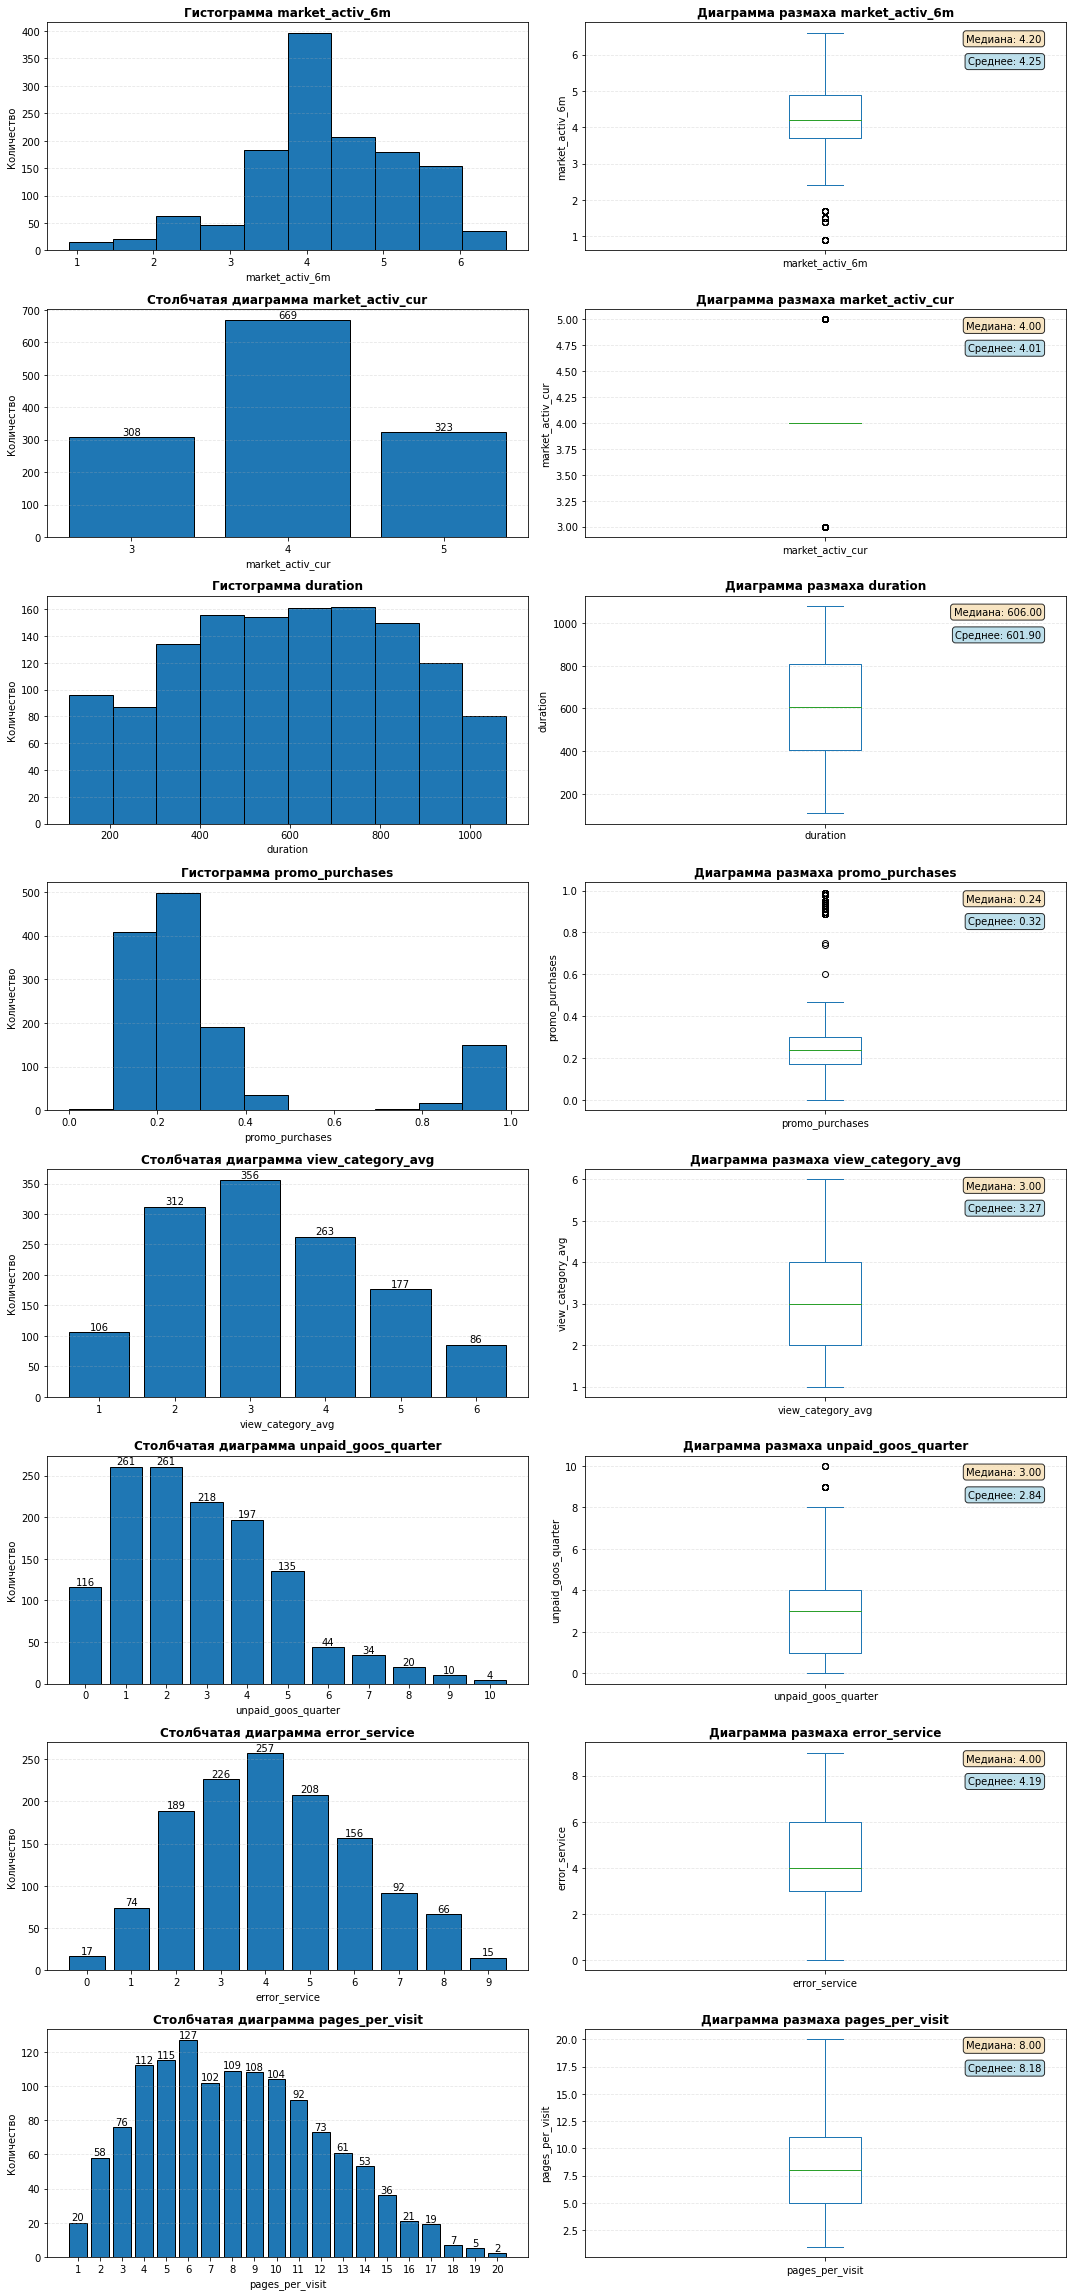

In [33]:
# Стоим графики распределения количественных признаков
plot_distribution_and_boxplot(market_file.drop('id', axis=1))

* Аномальных значений на графиках не обнаружено. Все данные выглядят правдоподобно.
* Признаки `market_activ_6m` и `unpaid_goos_quarter` имеют статистические выбросы незначительно превыщающие порог в 1,5 межквартильных размаха. Но эти выбросы отражают реальные значения и являются хвостами распределения. Поэтому эти значения лучше оставить.
* Признак `promo_purchases` (доля покупок по акции) имеет бимодальное распределение, из-за чего на даграмме размаха видны выбросы. Предположительно, учащение покупок по акции возле значения "1" можно объяснить тем, что есть такие клиенты, которые совершают покупки исключительно по акции. Возможно, это какие-то очень выгодные для клиента акции, которые сподвигают его совершить покупку, так как за последние 6 месяцев он не совершал покупок. Это данные тоже отражают реальные процессы, поэтому лучше оставить такие данные.<br>
* Признак `unpaid_goos_quarter` имеет распределение Пуассона, и это ожидаемо.
* Остальные признаки имеют распределение близкое к нормальному, что тоже вполне ожидаемо.

Также в признаке `duration` нет клиентов, которые зарегистрировались на сайте менее 90 дней, так как по таким покупателям невозможно достоверно оценить снижение покупательской активности. Минимальное значение 110 дней. Однако, по таким покупателям недосточно может быть накоплено данных, чтобы считать их достоверными. Посмотрим сколько покупателей со сроком регистрации на сайте менее полугода.<br>

In [34]:
# Считаем кол-во поекпателей со сроком регистрации менее полугода
market_file.query('duration < 180').shape[0]

61

Таких покупателей всего 61 человек. Это не так много. Поэтому данные о снижении покупательской способности можно считать правдоподобными, а не случайными.<br>

Посмотрим теперь на распределение категориальных признаков.

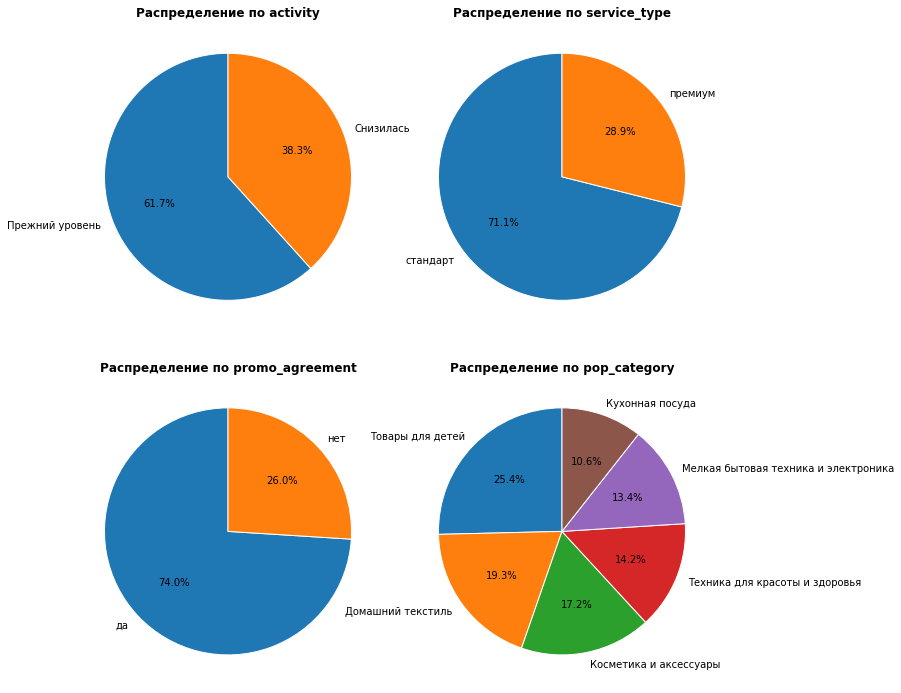

In [35]:
# Строим список категориальных столбцов
columns = market_file.select_dtypes(include="object").columns.tolist()

# Создаем 2x2 подграфика
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 строки, 2 колонки
axes = axes.ravel()   # Преобразуем в плоский массив для удобства

# Строим круговые диаграммы для каждого столбца
for i, col in enumerate(columns):
    counts = market_file[col].value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    axes[i].set_title(f'Распределение по {col}', fontweight='bold')

plt.tight_layout()
plt.show()

* Наблюдается незначительный дисбаланс классов в целевом признаке (61.7% / 38.3%). На качество обучения модели такой дисбаланс классов практически не будет влиять. Поэтому применение каких-то методов обработки дисбаланса не требуется.
* По типу подписки преобладают покупатели с типом "стандарт" (71.1%). Доля покупателей с подпиской "премиум" - 28.9%
* Согласие на рассылку дополнительных (акционных) предложений товаров подписали 74% покупателей, это почти 3/4 от всех покупателей.
* Всего в выборке представлено 6 категорий товаров. Самая популярная категория товаров среди постоянных покупателей это "Товары для детей" - 25.4%. Наименее популярная категория торовав - "Кухонная посуда".

Теперь посмотрим на графиках как изменился уровень активности покупателей в зависимости от типа подписки, согласия на проморассылку и популярной категории.

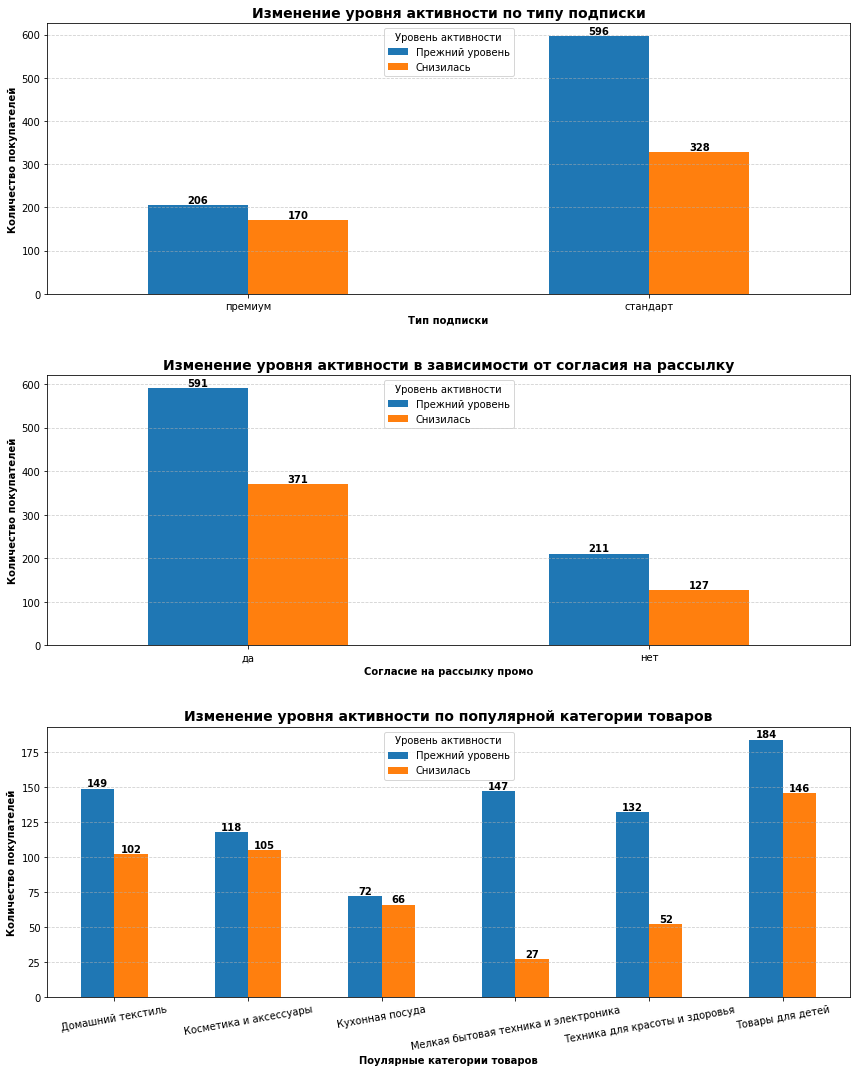

In [36]:
# Создаем сетку графиков 3x1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Параметры для всех графиков
plots = [
    ('service_type', 0, 'Тип подписки', 'Изменение уровня активности по типу подписки'),
    ('promo_agreement', 0,'Согласие на рассылку промо', 'Изменение уровня активности в зависимости от согласия на рассылку'),
    ('pop_category', 10, 'Поулярные категории товаров', 'Изменение уровня активности по популярной категории товаров')]

# Проходим циклом по настройкам и осям
for ax, (i, rot, x_label, title) in zip(axes.flat, plots):
    market_file.pivot_table(index=i, columns='activity', values='id', aggfunc='count').plot(kind='bar', ax=ax)
    
    # Добавляем аннотации с значениями над столбцами
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:  # Проверяем, что значение не NaN и не 0
            ax.annotate(f'{height:.0f}',
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', xytext=(0, 5),
                        fontweight='bold', textcoords='offset points')
            
    ax.legend(title='Уровень активности', loc='upper center')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel(x_label, fontweight='bold')
    ax.set_ylabel("Количество покупателей", fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=rot)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Отступ между графиками
plt.show()

* В абсолютном выражении наибольшее снижение активности выявлено среди покупателей с типом подписки "Стандарт", так как доля покупателей с типом подписки "Стандарт" больше чем с типом "Премиум". Однако, в долевом выражении снижение активности чаще встречается среди покупателей с типом подписки "Премиум" и составляет около половины (45%). Это очень существенно, так как предполагалось, что покупатели с типом подписки "Премиум" должны сохранять уровень активности. При этом среди покупателей с типом подписки "Стандарт" снижение активности выявлено у 35% покупателей.
* В долевом выражении снижение активности среди покупателей согласных на проморассылку и не согласных на проморассылку проявляется одинаково.
* В абсолютном выражении наибольшее снижение активности наблюдается у покупателей, которые чаще всего покупали товары в категории "Товары для детей". Также значительное снижение активности наблюдается в категориях "Косметика и аксессуары" и "Домашний текстиль". Если же смотреть в относительном выражении, то наиболее всего снижение активности у покупателей из категорий: "Косметика и аксессуары", "Кухонная посуда", "Товары для детей. Это может указывать на возникновение проблем в этих категориях товаров (завышение цен, снижение качества, неактуальный ассортимент и др.). Этим категориям стоит уделить особое внимание.

### Таблица 'market_money'

Посмотрим основные статистические параметры по выручке с покупателей в датафрейме `market_money`.

In [37]:
# Выведем основные статистики количественных признаков
market_money.drop(columns='id').describe()

,revenue
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000


Среднее и медианное значения выручки незначительно отличаются друг от друга. При этом среднее значение выручки немного выше по причине больших максимальных значений. Посмотрим на распределение значений на гистограмме в датафрейме `market_money`.

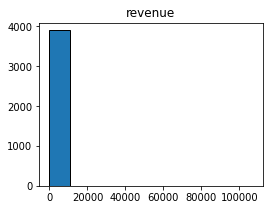

In [38]:
# Выведем матрицу гистограм (кроме столбца 'id')
market_money.drop(columns='id').hist(figsize=(4, 3), edgecolor='black', grid=False);

Такое распределение указывает на то, есть выбросы или аномальные значения. Из таблицы видно, что есть покупатели, у которых выручка за месяц составила 106.8 тыс. у.е. Это почти в 20 раз больше среднего значения. Посмотрим всех клиентов, у которых сумма месячной выручки более 10 тыс. у.е.

In [39]:
# Выведем строки с высоким значением выручки
market_money.query('revenue > 10000')

,id,period_rev,revenue
98,215380,текущий_месяц,106862.2


В выборке всего одна строка с высоким значением выручки. Очевидно, что является выбросом с точки зрения статистики. Можно предположить, что покупатель мог совершить какую-то большую разовую покупку. Удалять эту строку не будем. После объединения таблиц посмотрим более полную информацию по этому покупателю.

Отфильтруем эту строку и посмотрим на распределение значений выручки на гистограмме. Так как выручка по каждому месяцу содержится в одном столбце, правильно будет смотреть распределение отдельно в разрезе каждого периода.

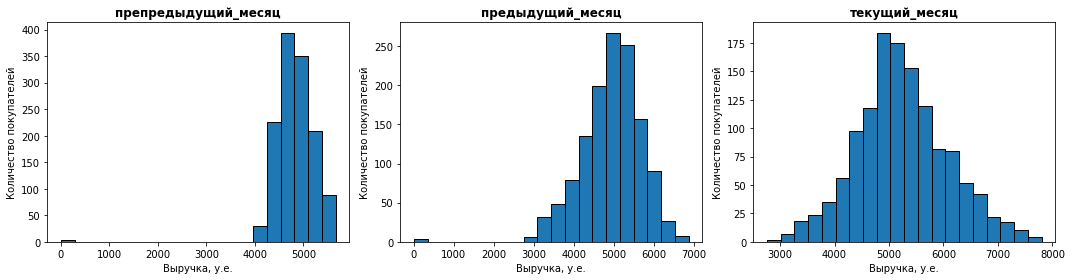

In [40]:
# Создаем сетку 1×3
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Задаем последовательность периодов
periods = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']
titles = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']

for i, (period, title) in enumerate(zip(periods, titles)):
    data = market_money.query(f"revenue < 10000 & period_rev=='{period}'").drop(columns='id')
    data.hist(bins=20, edgecolor='black', grid=False, ax=axes[i])
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_xlabel('Выручка, у.е.')
    axes[i].set_ylabel('Количество покупателей')

plt.tight_layout()
plt.show()

Все распределения очень близки по форме к нормальному. В препредыдущем и предыдущем месяцах заметны несколько значений выручки около нуля. Выведем эти строки.

In [41]:
# Выведем строки с низким значением выручки
market_money.query('revenue < 1000')

,id,period_rev,revenue
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Всего 6 таких строк, с нулевым значением выручки. При этом можно обратить внимание, что это информация о выручке по трем покупателям. Скорее всего это означает, что эти покупатели не совершали покупок в эти месяцы, но совершали покупки в текущем месяце. Поэтому эти строки удалять нельзя. Заполнять средними или медианными значениями эти строки тоже нельзя. Оставим их без изменения.

Посмотрим теперь на динамику общей выручки по всем клиентам за каждый период.

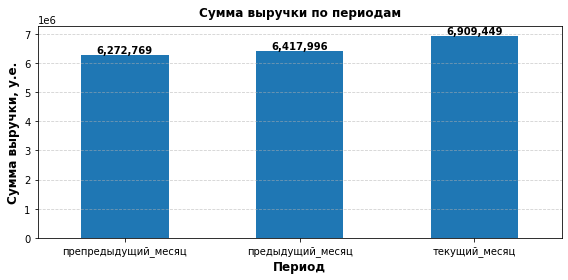

In [42]:
# Создаем сводную таблицу
pivot_data = market_money.pivot_table(index='period_rev', values='revenue', aggfunc='sum')

# Задаем последовательность периодов
desired_order = ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']

# Переиндексируем данные в нужном порядке
pivot_data = pivot_data.reindex(desired_order)

# Строим график
ax = pivot_data.plot(kind='bar', figsize=(8, 4), rot=0, legend=False)

# Добавляем значения на столбцы
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:  # Проверяем, что значение не NaN и не 0
        ax.annotate(f'{height:,.0f}',
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 5),
                    fontweight='bold', textcoords='offset points')

plt.title('Сумма выручки по периодам', fontweight='bold', pad=10)
plt.xlabel('Период', fontsize=12, fontweight='bold')
plt.ylabel('Сумма выручки, у.е.', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

На графике видно, что есть небольшой прирост выручки от месяца к месяцу. Однако, несмотря на общий рост выручки по всем покупателм, наблюдается существенноне снижение уровня активности.

### Таблица 'market_time'

Посмотрим основные статистические параметры по времени проведеному покупателями на сайте в датафрейме `market_time`.

In [43]:
# Выведем основные статистики количественных признаков
market_time.drop(columns='id').describe()

,minutes
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000


Среднее и медианное значения времени на сайте очень близки. Посмотрим на распределение значений на гистограмме.

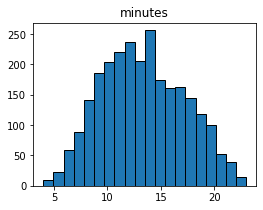

In [44]:
# Выведем матрицу гистограм (кроме столбца 'id')
market_time.drop(columns='id').hist(bins=20, figsize=(4, 3), edgecolor='black', grid=False);

Распределение по форме очень близко к нормальному, выбросов нет. Так как время проведенное клиентами на сайте по каждому месяцу содержится в одном столбце, правильно будет смотреть распределение отдельно в разрезе каждого периода.

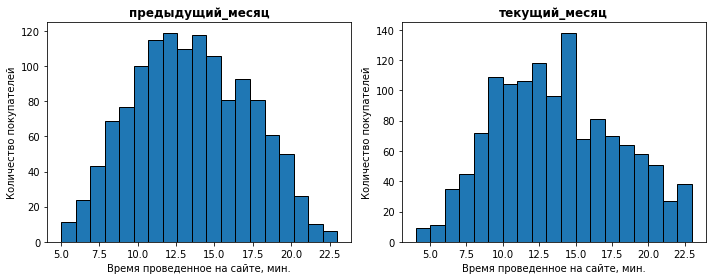

In [45]:
# Создаем сетку 1×2
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Периоды для анализа
periods = ['предыдущий_месяц', 'текущий_месяц']
titles = ['предыдущий_месяц', 'текущий_месяц']

for i, (period, title) in enumerate(zip(periods, titles)):
    data = market_time.query(f"minutes < 10000 & period_time=='{period}'").drop(columns='id')
    data.hist(bins=19, edgecolor='black', grid=False, ax=axes[i])
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_xlabel('Время проведенное на сайте, мин.')
    axes[i].set_ylabel('Количество покупателей')

plt.tight_layout()
plt.show()

Распределения по форме очень близки к нормальному, выбросов не наблюдается. Посмотрим на динамику общего времени проведенного на сайте всеми клиентами за каждый период.

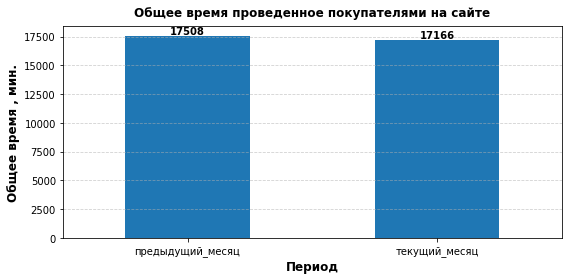

In [46]:
# Создаем сводную таблицу
pivot_data = market_time.pivot_table(index='period_time', values='minutes', aggfunc='sum')

# Задаем последовательность периодов
desired_order = ['предыдущий_месяц', 'текущий_месяц']

# Переиндексируем данные в нужном порядке
pivot_data = pivot_data.reindex(desired_order)

# Строим график
ax = pivot_data.plot(kind='bar', figsize=(8, 4), rot=0, legend=False)

# Добавляем значения на столбцы
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:  # Проверяем, что значение не NaN и не 0
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 5),
                    fontweight='bold', textcoords='offset points')

plt.title('Общее время проведенное покупателями на сайте', fontweight='bold', pad=10)
plt.xlabel('Период', fontsize=12, fontweight='bold')
plt.ylabel('Общее время , мин.', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

На графике видно незначительное снижение общего времени проведенного на сайте всеми клиентами. Возможно, это снижение имеет связь со снижением уровня активности покупателей. Несмотря на рост выручки в текущем месяце, время проведенное покупателями на сайте снизилось.

### Таблица 'money'

Посмотрим основные статистические параметры по прибыли с каждого покупателя в датафрейме `money`.

In [47]:
# Выведем основные статистики количественных признаков
money.drop(columns='id').describe()

,profit
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


Среднее и медианное значения прибыли очень близки, аномальных значений и выбросов не обнаружено. Посмотрим на распределение значений на гистограмме.

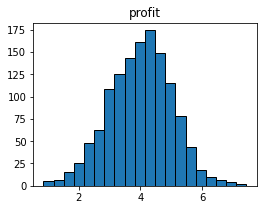

In [48]:
# Выведем матрицу гистограм (кроме столбца 'id')
money.drop(columns='id').hist(bins=20, figsize=(4, 3), edgecolor='black', grid=False);

Распределение очень близко по форме к нормальному распределению. Выбросов не наблюдается.

**Вывод по разделу 4**<br>

*Датасет `market_file`*<br>
* Наблюдается незначительный дисбаланс классов в целевом признаке (61.7% / 38.3%). На качество обучения модели такой дисбаланс классов практически не будет влиять. Поэтому применение каких-то методов обработки дисбаланса не требуется.
* По типу подписки преобладают покупатели с типом "стандарт" (71.1%). Доля покупателей с подпиской "премиум" - 28.9%
* Согласие на рассылку дополнительных (акционных) предложений товаров подписали 74% покупателей, это почти 3/4 от всех покупателей.
* В выборке представлено 6 популярных категорий товаров. Самая популярная категория товаров среди постоянных покупателей это "Товары для детей" - 25.4%. Наименее популярная категория торовав - "Кухонная посуда".
* В абсолютном выражении наибольшее снижение активности выявлено среди покупателей с типом подписки "Стандарт". В долевом выражении снижение активности чаще встречается среди покупателей с типом подписки "Премиум" и составляет около половины (45%). Среди покупателей с типом подписки "Стандарт" снижение активности выявлено у 35% покупателей.
* В долевом выражении снижение активности среди покупателей согласных на проморассылку и не согласных на проморассылку проявляется одинаково.
* В абсолютном выражении наибольшее снижение активности наблюдается у покупателей, которые чаще всего покупали товары в категории "Товары для детей". Также значительное снижение активности наблюдается в категориях "Косметика и аксессуары" и "Домашний текстиль". Если же смотреть в относительном выражении, то наиболее всего снижение активности у покупателей из категорий: "Косметика и аксессуары", "Кухонная посуда", "Товары для детей.<br>

*Датасет `market_money`*<br>
* Есть небольшой прирост выручки от месяца к месяцу. Однако, несмотря на общий рост выручки по всем покупателм, наблюдается существенноне снижение уровня активности. Данные по выручке распределены нормально.<br>

*Датасет `market_time`*<br>
* Есть незначительное снижение общего времени проведенного на сайте всеми клиентами. Возможно, это снижение имеет связь со снижением уровня активности покупателей. Несмотря на рост выручки в текущем месяце, время проведенное покупателями на сайте снизилось. Данные о времени проведенном на сайте распределены нормально.<br>

*Датасет `money`*<br>
* Данные о прибыльности покупателей распределены нормально. Выбросов нет.

## Объединение таблиц

Создадим основную таблицу `market` и в качестве индекса присвоем значения поля `id`, так как оно уникально для каждого покупателя. Установку индексов сделаем для всех объединяемых таблиц, чтобы можно было выполнить объединение по индексам.

In [49]:
# Создаем общую таблицу и сбрасываем индексы
market = market_file.set_index('id').copy()

In [50]:
# Преобразовываем таблицу перед объединением
transposed_money = market_money.pivot(index='id', columns='period_rev', values='revenue')

# Проверяем результат преобразования
transposed_money.head(2)

period_rev,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6


In [51]:
# Переименовываем столбцы к виду snake_case
transposed_money.columns = ['revenue_mon_pre', 'revenue_mon_pre_pre', 'revenue_mon_cur']

# Проверяем результат переименования
transposed_money.head(2)

,revenue_mon_pre,revenue_mon_pre_pre,revenue_mon_cur
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6


In [52]:
# Преобразовываем таблицу перед объединением
transposed_time = market_time.pivot(index='id', columns='period_time', values='minutes')

# Проверяем результат преобразования
transposed_time.head(2)

period_time,предыдущий_месяц,текущий_месяц
id,,
215348,13,14
215349,12,10


In [53]:
# Переименовываем столбцы к виду snake_case
transposed_time.columns = ['minutes_mon_pre', 'minutes_mon_cur']

# Проверяем результат переименования
transposed_time.head(2)

,minutes_mon_pre,minutes_mon_cur
id,,
215348,13,14
215349,12,10


In [54]:
# Объединение по индексу market и transposed_money
market = market.join(transposed_money, how='inner')

# Объединение по индексу market и transposed_time
market = market.join(transposed_time, how='inner')

# Проверяем результат объединения
market.head(2)

,activity,service_type,promo_agreement,market_activ_6m,market_activ_cur,duration,promo_purchases,pop_category,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit,revenue_mon_pre,revenue_mon_pre_pre,revenue_mon_cur,minutes_mon_pre,minutes_mon_cur
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10


После объединения таблиц проверим строку с выбросом, который обнаружили в признаке `revenue_mon_cur` на этапе исследовательского анализа.

In [55]:
# Выведем строки с высоким значением выручки
market.query('revenue_mon_cur > 10000')

,activity,service_type,promo_agreement,market_activ_6m,market_activ_cur,duration,promo_purchases,pop_category,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit,revenue_mon_pre,revenue_mon_pre_pre,revenue_mon_cur,minutes_mon_pre,minutes_mon_cur
id,,,,,,,,,,,,,,,,,
215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7,6077.0,5051.0,106862.2,12,14


Такой выброс в несколько раз отличается от среднего значения и может сильно исказить модель предсказания, особенно если это будет модель логистической регрессии. Эту строку лучше удалить.

Также в препредыдущем и предыдущем месяцах были наблюдения с нулевым значением выручки. Выведем эти строки.

In [56]:
# Выведем строки с высоким значением выручки
market.query('(revenue_mon_pre < 1000) or (revenue_mon_pre_pre < 1000)')

,activity,service_type,promo_agreement,market_activ_6m,market_activ_cur,duration,promo_purchases,pop_category,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit,revenue_mon_pre,revenue_mon_pre_pre,revenue_mon_cur,minutes_mon_pre,minutes_mon_cur
id,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5,0.0,0.0,3293.1,13,14
215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,3,9,5,0.0,0.0,5986.3,12,6
215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,2,4,2,0.0,0.0,4735.0,13,11


Таких покупателей всего 3 человека. При этом у этих всех покупателей не было покупок в течение 2-х месяцев. По сроку регистрации на сайте этих покупателей сложно назвать постоянными. При таком коротком сроке с момента регистрации, в течение 2-х месяцев у них не было никаких покупок. Такие значения выручки будут выглядеть для модели как существенные выбросы и будут сильно искажать предсказания активности других покупателей. При этом по пропускам этих значений уже можно однозначно сказать, что активность у этих покупателей снизилась. Этих прокупателей однозначно нужно удалять из выборки.

In [57]:
# Удалаяем аномалии
market = market[(market['revenue_mon_pre'] > 0) & (market['revenue_mon_cur'] < 10000)]

In [58]:
# Проверим пропуски и типы данных после объединения
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   activity             1296 non-null   object 
 1   service_type         1296 non-null   object 
 2   promo_agreement      1296 non-null   object 
 3   market_activ_6m      1296 non-null   float64
 4   market_activ_cur     1296 non-null   int64  
 5   duration             1296 non-null   int64  
 6   promo_purchases      1296 non-null   float64
 7   pop_category         1296 non-null   object 
 8   view_category_avg    1296 non-null   int64  
 9   unpaid_goos_quarter  1296 non-null   int64  
 10  error_service        1296 non-null   int64  
 11  pages_per_visit      1296 non-null   int64  
 12  revenue_mon_pre      1296 non-null   float64
 13  revenue_mon_pre_pre  1296 non-null   float64
 14  revenue_mon_cur      1296 non-null   float64
 15  minutes_mon_pre      1296 non-n

**Вывод по разделу 5**<br>
* Перед объединением таблицы `market_money` и `market_time` были преобразованы (данные по каждому месяцу были представлены в отдельном столбце). В качестве индекса были присвоены занчения поля `id`.
* Объединение было выполнено по индексу, и прошло без ошибок.
* После объединения таблиц были удалены строки с аномальными значениями выручки (без выручи, и с выручкой более 10 000 у.е.)

## Корреляционный анализ

Предположительно на активность покупателей могут влиять множество факторов: ассортимент и качество товаров, количество категорий в магазине, маркетинговая активность магазина (акционные предложения), уровень цен и скидочная политика, скорость обработки заказов, скорость и условия доставки, качество работы и удобство сайта. Но в представленных данных нет большинства из этих признаков. Проверим наличие связи между существующими признаками. Посмотрим корреляцию между количественными и категориальными признаками с помощью матрицы корреляции (Phik).

In [59]:
# Вычисляем матрицу Phik корреляции
phik_matrix = phik.phik_matrix(
    df=market,
    interval_cols=list(market.select_dtypes(include=[int, float]).columns),
    verbose=False)

# Применяем стилизацию
(phik_matrix
 .style.background_gradient(cmap='Blues', axis=None).format('{:.2f}')
 .set_caption('Матрица корреляции (Phik) количественных и категориальных признаков')
 .set_table_styles([{
     'selector': 'th.col_heading',
     'props': [('writing-mode', 'vertical-rl'), ('transform', 'rotate(180deg)'),
         ('vertical-align', 'center'), ('text-align', 'left'), ('padding', '15px')]
 }]))

,activity,service_type,promo_agreement,market_activ_6m,market_activ_cur,duration,promo_purchases,pop_category,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit,revenue_mon_pre,revenue_mon_pre_pre,revenue_mon_cur,minutes_mon_pre,minutes_mon_cur
activity,1.00,0.13,0.00,0.54,0.00,0.10,0.51,0.30,0.54,0.51,0.22,0.75,0.22,0.50,0.20,0.69,0.58
service_type,0.13,1.00,0.29,0.09,0.05,0.40,0.03,0.07,0.19,0.12,0.08,0.10,0.00,0.07,0.12,0.13,0.00
promo_agreement,0.00,0.29,1.00,0.00,0.05,0.25,0.01,0.07,0.07,0.20,0.02,0.04,0.08,0.00,0.06,0.04,0.00
market_activ_6m,0.54,0.09,0.00,1.00,0.08,0.00,0.28,0.15,0.21,0.29,0.14,0.40,0.16,0.32,0.04,0.36,0.33
market_activ_cur,0.00,0.05,0.05,0.08,1.00,0.17,0.00,0.14,0.25,0.14,0.12,0.00,0.05,0.00,0.00,0.11,0.06
duration,0.10,0.40,0.25,0.00,0.17,1.00,0.00,0.00,0.19,0.19,0.18,0.12,0.13,0.11,0.15,0.03,0.10
promo_purchases,0.51,0.03,0.01,0.28,0.00,0.00,1.00,0.12,0.20,0.24,0.00,0.31,0.06,0.23,0.07,0.26,0.25
pop_category,0.30,0.07,0.07,0.15,0.14,0.00,0.12,1.00,0.23,0.25,0.00,0.16,0.25,0.04,0.24,0.20,0.09
view_category_avg,0.54,0.19,0.07,0.21,0.25,0.19,0.20,0.23,1.00,0.33,0.07,0.26,0.10,0.18,0.09,0.16,0.18
unpaid_goos_quarter,0.51,0.12,0.20,0.29,0.14,0.19,0.24,0.25,0.33,1.00,0.03,0.36,0.25,0.26,0.23,0.26,0.23


**Описание коррелиции признаков**<br>

* Самую высокую корреляцию с целевым признаком имеет признак "Кол-во страниц за визит" `pages_per_visit` - 0.75.
* Умеренную корреляцию с целевым признаком имеют признаки: `minutes_mon_pre`, `minutes_mon_cur`, `market_activ_6m`, `view_category_avg`, `unpaid_goos_quarte`, `promo_purchases`.
* Между признаками `revenue_mon_cur` и `revenue_mon_pre` имеется сильная связь. Такую связь лучше устранить. Эти 2 признака можно преобразовать в один `revenue_diff`: разница в выручке текущего и предыдущего месяца. Также по аналогии можно создать новый признак `revenue_diff_pre` как разница в выручке предыдущего и препредыдущего месяца. Изменение динамики в выручке может лучше показывать изменения в уровне активности покупателей. 
* Мультиколлинеарности между признаками не наблюдается.


Посмотрим на наличие линейных зависимостей между входными признаками с помощью матрицы диаграмм рассеяния.

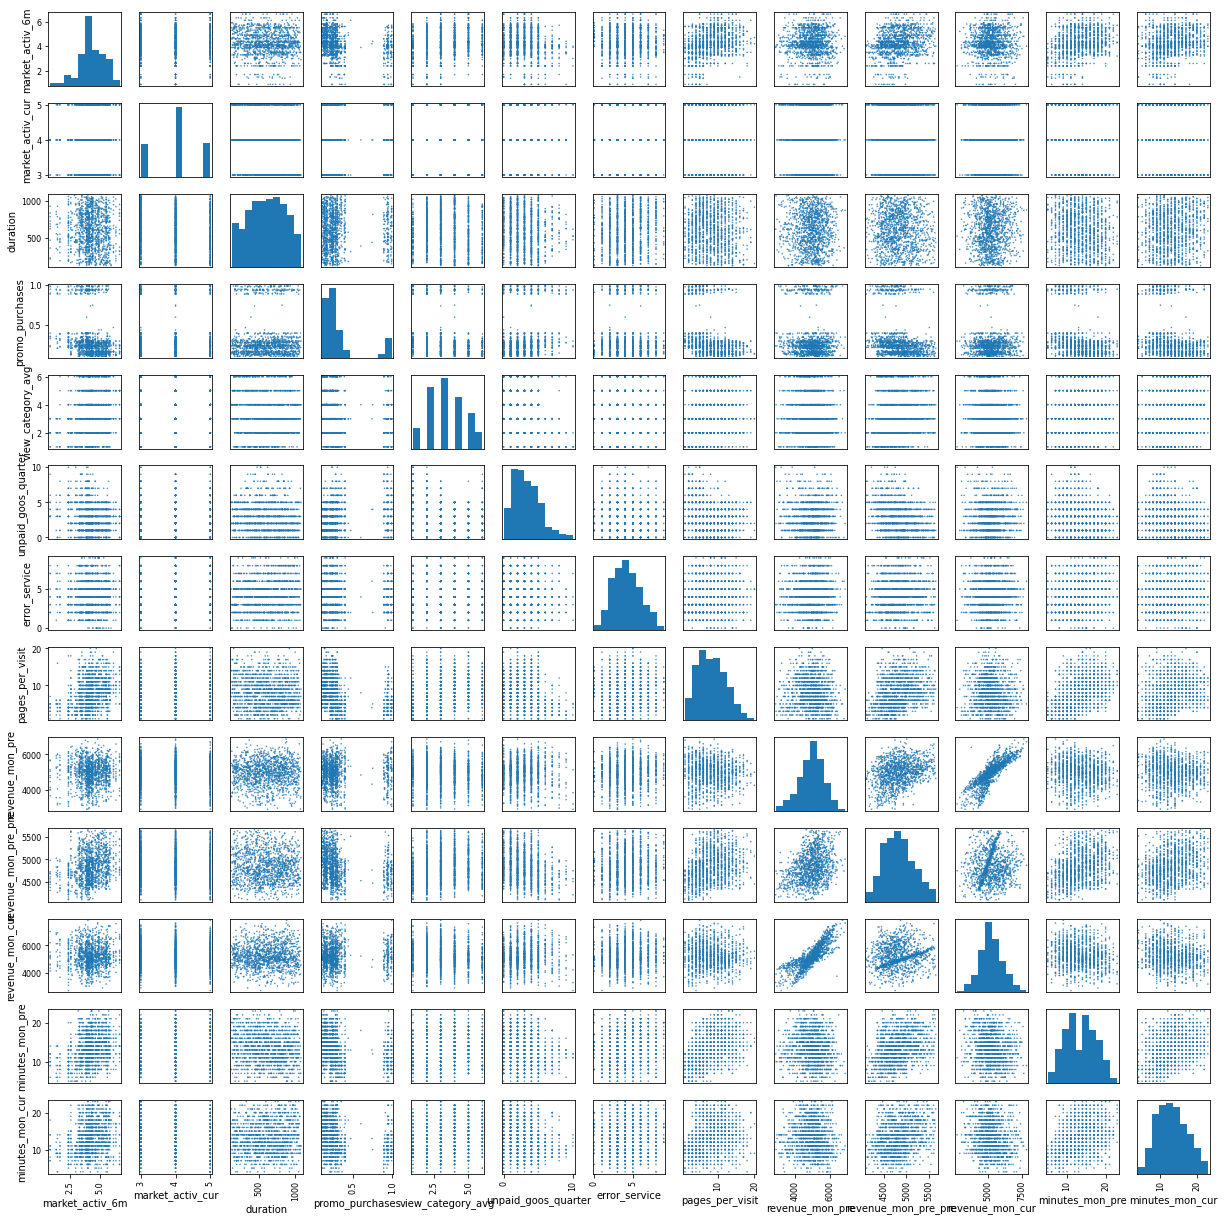

In [60]:
pd.plotting.scatter_matrix(market, 
                          figsize=(17, 17),
                          alpha=0.8,           # Прозрачность точек
                          diagonal='hist',     # Гистограммы вместо KDE
                          grid=True,           # Сетка
                          marker='.',          # Тип маркера
                          s=10)               # Размер точек

plt.tight_layout()
plt.show()

Визуально видно, прослеживается линейная зависимости между `revenue_mon_cur` и `revenue_mon_pre`, что как раз подтверждается высоким значением коэффициента кореляции.

Чтобы уменьшить количество признаков и устранить высокую корреляцию между входными признаками, создадим 2 новых признака на основании 3-х признаков.

In [61]:
# Создаем новый признак
market['revenue_diff_pre'] = market['revenue_mon_pre'] - market['revenue_mon_pre_pre']
market['revenue_diff'] = market['revenue_mon_cur'] - market['revenue_mon_pre']

Признак `promo_purchases` имеет бимодальное распределение. Этот признак можно преобразовать в категориальный ранговый признак с высоким и низким значеним доли доли покупок по акции.

In [62]:
# Создаем функцию для разделения на категории
def categorized_promo_purchases(promo_purchases):
    if promo_purchases > 0.55:
        return 'Высокая_доля'
    else:
        return 'Низкая_доля'

# Создаем новый признак с помощью функции    
market['cat_promo_purchases'] = market['promo_purchases'].apply(categorized_promo_purchases)

Посмотрим корреляцию новых признаков с остальными.

In [63]:
# Вычисляем матрицу Phik корреляции
phik_matrix = phik.phik_matrix(
    df=market.drop(['revenue_mon_pre','revenue_mon_pre_pre', 'revenue_mon_cur', 'cat_promo_purchases'], axis=1),
    interval_cols=list(market.select_dtypes(include=[int, float]).columns),
    verbose=False)

# Применяем стилизацию
(phik_matrix
 .style.background_gradient(cmap='Blues', axis=None).format('{:.2f}')
 .set_caption('Матрица корреляции (Phik) количественных и категориальных признаков')
 .set_table_styles([{
     'selector': 'th.col_heading',
     'props': [('writing-mode', 'vertical-rl'), ('transform', 'rotate(180deg)'),
         ('vertical-align', 'center'), ('text-align', 'left'), ('padding', '15px')]
 }]))

,activity,service_type,promo_agreement,market_activ_6m,market_activ_cur,duration,promo_purchases,pop_category,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit,minutes_mon_pre,minutes_mon_cur,revenue_diff_pre,revenue_diff
activity,1.00,0.13,0.00,0.54,0.00,0.10,0.51,0.30,0.54,0.51,0.22,0.75,0.69,0.58,0.44,0.11
service_type,0.13,1.00,0.29,0.09,0.05,0.40,0.03,0.07,0.19,0.12,0.08,0.10,0.13,0.00,0.03,0.07
promo_agreement,0.00,0.29,1.00,0.00,0.05,0.25,0.01,0.07,0.07,0.20,0.02,0.04,0.04,0.00,0.09,0.02
market_activ_6m,0.54,0.09,0.00,1.00,0.08,0.00,0.28,0.15,0.21,0.29,0.14,0.40,0.36,0.33,0.22,0.10
market_activ_cur,0.00,0.05,0.05,0.08,1.00,0.17,0.00,0.14,0.25,0.14,0.12,0.00,0.11,0.06,0.06,0.00
duration,0.10,0.40,0.25,0.00,0.17,1.00,0.00,0.00,0.19,0.19,0.18,0.12,0.03,0.10,0.18,0.08
promo_purchases,0.51,0.03,0.01,0.28,0.00,0.00,1.00,0.12,0.20,0.24,0.00,0.31,0.26,0.25,0.16,0.00
pop_category,0.30,0.07,0.07,0.15,0.14,0.00,0.12,1.00,0.23,0.25,0.00,0.16,0.20,0.09,0.25,0.00
view_category_avg,0.54,0.19,0.07,0.21,0.25,0.19,0.20,0.23,1.00,0.33,0.07,0.26,0.16,0.18,0.13,0.00
unpaid_goos_quarter,0.51,0.12,0.20,0.29,0.14,0.19,0.24,0.25,0.33,1.00,0.03,0.36,0.26,0.23,0.32,0.05


Мультиколлинеарности или сильной зависимости во входных признаках не наблюдается. Новый преобразованный признак `cat_promo_purchases` имеет корреляцию с целевым признаком чуть меньше, чем исходный признак. Но есть входные признаки, которые имеют очень низкий или даже нулевой коффициент корреляции с целевым. Для линейных моделей такие признаки не имеют значения и даже могут ухудшить качество модели (лог. регрессия, kNN, SVC с лин. ядром), но для дерева решений эти признакми могут полезны. Поэтому пока оставим все признаки как есть.

___

**Вывод по разделу 6**<br>
* Самую высокую корреляцию с целевым признаком имеет признак "Кол-во страниц за визит" pages_per_visit - 0.75.
* Умеренную корреляцию с целевым признаком имеют признаки: `minutes_mon_pre`, `minutes_mon_cur`, `market_activ_6m`, `view_category_avg`, `unpaid_goos_quarte`, `promo_purchases`.
* Между признаками `revenue_mon_cur` и `revenue_mon_pre` имеется сильная связь 0.83, которая на диаграмме рассеяния выглядит как линейная связь. Эта связь была устранена.
* На основании признаков `revenue_mon_pre_pre`, `revenue_mon_pre` и `revenue_mon_cur` созданы два новых: разница в выручке предыдущего и препредыдущего месяцев, и разница в выручке предыдущего и текущего месяцев. Изменение динамики в выручке может лучше показывать изменения в уровне активности покупателей.
* Мультиколлинеарности между признаками не наблюдается.
* Есть входные признаки (`promo_agreement`, `market_activ_cur`, `revenue_diff`), которые имеют нулевой коэффициент корреляции с целевым.

In [64]:
# Выведем значения индекса в отдельный столбец
market['id'] = market.index

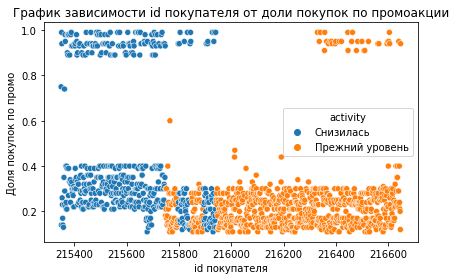

In [65]:
# Строим график рассеяния для значений 'id' и 'promo_purchases'
ax = sns.scatterplot(data=market, x='id', y='promo_purchases', hue='activity')
ax.legend(title='activity', loc='center right')
ax.set_xlabel("id покупателя")
ax.set_ylabel("Доля покупок по промо")
ax.set_title("График зависимости id покупателя от доли покупок по промоакции")
plt.tight_layout()
plt.show()

Из этого графика очевидно, что данные имеют искуственное происхождение, и целевой признак генерировался на основе значений id.

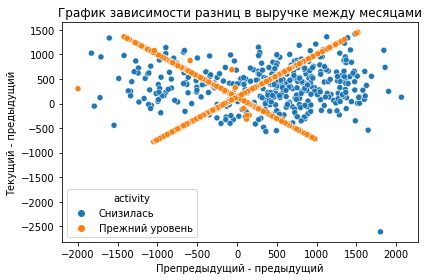

In [66]:
# Строим график рассеяния для разниц в выручке
ax = sns.scatterplot(data=market, x='revenue_diff_pre', y='revenue_diff', hue='activity')
ax.legend(title='activity', loc='lower left')
ax.set_xlabel("Препредыдущий - предыдущий")
ax.set_ylabel("Текущий - предыдущий")
ax.set_title("График зависимости разниц в выручке между месяцами")
plt.tight_layout()
plt.show()

Этот график еще более сильно показывает искуственное происхождение данных. Оранжевых значений кажется меньше, потому что точки на графике наложились друг на друга. **Таким образом, можно предположить, что можно найти такую модель, которая с высокой вероятностью предскажем практически все значения целевого признака.**

## Использование пайплайн

По условиям задания нам нужно выявить как можно больше покупателей, у которых есть высокая вероятность снижения покупательской активности. Таким образом, нам нужно как можно чаще предсказывать класс 1 (покупательская активность снизилась), даже если мы предскажем ошибочно такого покупателя. Для этого лучше всего подходит метрика `recall`. Но при таком подходе есть вероятность, что модель тогда начнет присваивать как можно большему числу покупателей класс 1. Чтобы предотвратить снижение покупательской активности магазину нужно сформировать для таких покупателей персонализированные предложения, которые могут потребовать дополнительных расходов (дополнительные скидка, маркетинговые коммуникации), в том числе и для покупателей, которые бы покупали на прежнем уровне без этих мероприятий. И таким образом, выгода от предотвращения покупательской активности может перекрыться расходами на эти мероприятия. Поэтому при максимальном значении `recall`, для анализа наших моделей нужно рассматривать также метрики `roc_auc` или `fbeta_score` (с показателем beta >= 2, который чаще штрафует за FN). Другими словами, насколько нам придется пожертвовать значением `roc_auc`, чтобы получить максимальное значение `recall`.<br>
В качестве основной метрики выберем `recall`, а в качестве дополнительной будем использовать `roc_auc`, которая хорошо подходит при неcущественном дисбалансе в датасете (38/62). Но нужно учитывать, что для модели SVC по умолчанию метрика `roc_auc` не рассчитыватся, и нужно установить значение параметра `probability=True`.

Перед отбором входных признаков для удобства выведем их наименования и описание.<br>
* `service_type` — уровень сервиса в зависимости от наличия определенной подписки у пользователя (*«премиум» и «стандарт»*).
* `promo_agreement` — информация о наличии согласия покупателя на рассылку ему дополнительных предложений о товаре.
* `market_activ_6m` — среднемесячное кол-во маркетинговых коммуникаций (контактов) с покупателем за последние 6 месяцев.
* `market_activ_cur` — количество маркетинговых коммуникаций в текущем месяце.
* `duration` — сколько дней прошло с момента регистрации покупателя на сайте.
* `promo_purchases` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* `pop_category` — самая популярная категория товаров у покупателя за последние 6 месяцев.
* `view_category_avg` — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `unpaid_goos_quarter` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `error_service` — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
* `pages_per_visit` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
* `revenue_mon_pre` — сумма выручки за предыдущий месяц, в условных единицах.<br>
* `revenue_mon_pre_pre` — сумма выручки за препредыдущий месяц, в условных единицах.<br>
* `revenue_mon_cur` — сумма выручки за текущий месяц, в условных единицах.<br>
* `minutes_mon_pre` — значение времени, проведённого на сайте, в минутах (за предыдущий месяц).<br>
* `minutes_mon_cur` — значение времени, проведённого на сайте, в минутах (за текущий месяц).<br>
* `revenue_diff_pre` — разница в выручке предыдущего и препредыдущего месяца, в условных единицах.<br>
* `revenue_diff` — разница в выручке текущего и предыдущего месяца, в условных единицах.<br>

In [67]:
# Выведем список входных признаков для удобства копирования
print(list(market.drop(['activity'], axis=1).columns))

['service_type', 'promo_agreement', 'market_activ_6m', 'market_activ_cur', 'duration', 'promo_purchases', 'pop_category', 'view_category_avg', 'unpaid_goos_quarter', 'error_service', 'pages_per_visit', 'revenue_mon_pre', 'revenue_mon_pre_pre', 'revenue_mon_cur', 'minutes_mon_pre', 'minutes_mon_cur', 'revenue_diff_pre', 'revenue_diff', 'cat_promo_purchases', 'id']


Так как мы ранее создали новый признак `revenue_diff`, то признаки `revenue_mon_pre` `revenue_mon_pre_pre` нужно удалить из входных.

In [68]:
# Создаем входные признаки
X = market.drop(['id', 'activity', 'revenue_mon_cur', 'revenue_mon_pre', 'revenue_mon_pre_pre', 'promo_purchases'], axis=1)
# Создаем целевой признак
y = market['activity']

Преобразуем целевой признак. Значению 'Снизилась' присвоим 1, а значению 'Прежний уровень' 0

In [69]:
# Кодируем целевой признак
y = y.map({'Снизилась': 1, 'Прежний уровень': 0})

In [70]:
# Проверим результат преобразования
y.sample(5)

id
215729    1
215351    1
215527    1
216174    0
216449    0
Name: activity, dtype: int64

In [71]:
# Создаем тренировочную и тестовую выборки
# RANDOM_STATE = 42
# TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = TEST_SIZE, random_state = RANDOM_STATE,
    stratify = y)

In [72]:
# Выведем список всех категориальных колонок
X.select_dtypes(include="object").columns.tolist()

['service_type', 'promo_agreement', 'pop_category', 'cat_promo_purchases']

Категориальные признаки `service_type` , `promo_agreement` являются бинарными, поэтому их закодируем с помощью метода `OneHotEncoder`.<br>
А признак `pop_category` содержит несколько категорий, поэтому к нему применим метод кодирования `OrdinalEncoder`.

In [73]:
# Создаем список числовых и категориальных признаков
ohe_columns = ['service_type', 'promo_agreement', 'pop_category']
ord_columns = ['cat_promo_purchases']
num_columns = X.select_dtypes(include="number").columns.tolist()

Создадим пайплайн для кодирования бинарных категориальных признаков.

In [74]:
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

Создадим пайплайн для кодирования многоклассовых номинальных (не ранговых) категориальных признаков.

In [75]:
# SimpleImputer + ORD + SimpleImputer (без ранговых признаков)
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
                                  categories=[
                                      ['Низкая_доля', 'Высокая_доля']
                                  ])),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Создадим трасформер для преобразования всех входных признаков.

In [76]:
# Создаём трасформер
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Создадим финальный пайплайн. В качестве базовой укажем модель дерева решений.

In [77]:
# Создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создадим список словарей, где каждый словарь будет набором гиперпараметров для каждой отдельной модели. Так как для модели дерева решений масштабирование входных признаков неважно, добавим 3-й вариант "без масштабирования". Для модели SVC добавим параметр `probability=True`, который позволит считать вероятности предсказания классов. Это нужно для того, чтобы метрика `roc_auc` считалась правильно.

In [78]:
# Создаем набор гиперпараметров моделей
params = [   
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 8),
     'models__min_samples_split': range(2, 5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']},
    
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(5, 50, 5),
     'preprocessor__num': [StandardScaler(), MinMaxScaler()]},

    {'models': [SVC(random_state=RANDOM_STATE, probability=True)],
     'models__kernel': ['rbf'],
     'models__degree': range(3, 10), 
     'preprocessor__num': [StandardScaler(), MinMaxScaler()]},

    {'models': [LogisticRegression(random_state=RANDOM_STATE, solver='saga', max_iter=1000)],
     'models__penalty': ['l1', 'l2'],
     'models__C': [0.5, 1, 5],
     'preprocessor__num': [StandardScaler(), MinMaxScaler()]}
]

Запустим функцию автоматического подбора модели с лучшими гиперпараметрами. Так как вариантов гиперпараметров неотносительно немного, то выполним поиск модели с помощью функции GridSearchCV. Подберем лучшую модель на тренировочных данных и посчитаем метрики модели на кросс-валидации.

In [79]:
# Фиксируем начальное время
start_time = time.time()

# Создаем класс GridSearchCV с выбранными метриками
gs = GridSearchCV(
    pipe_final, 
    params, 
    scoring={'roc_auc':'roc_auc',
             'recall':'recall',
            },
    refit = 'recall',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Выполним поиск лучшей модели
gs.fit(X_train, y_train)

# Фиксируем конечное время и считаем разницу
end_time = time.time()
execution_time = end_time - start_time
print(f"Время обучения модели: {execution_time:.2f} секунд")

# Выводим лучшую модель
gs.best_estimator_

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Время обучения модели: 28.02 секунд


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['service_type',
                                                   'promo_agreement',
                                                   'pop_category']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['cat_promo_purchases']),
                                                 ('num', StandardScaler(),
                                                  ['market_activ_6m',
                                                   'market_activ_cur',
                                                   'duration',
                                                   'view_category_avg',
                                                   'unpaid_goos_quarter',
                                                   'error_service',
                                                   'pages_per_visit',
                                                   'minutes_mon_pre',
                                                   'minutes_mon_cur',
                                                   'revenue_diff_pre',
                                                   'revenue_diff'])])),
                ('models',
                 LogisticRegression(C=1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='saga'))])

Посмотрим параметры лучшей модели, полученной на тренировочных данных.

In [80]:
# Выведем параметры лучшей модели
gs.best_params_

{'models': LogisticRegression(max_iter=1000, random_state=42, solver='saga'),
 'models__C': 1,
 'models__penalty': 'l1',
 'preprocessor__num': StandardScaler()}

In [81]:
# Выведем значения recall для лучшей модели

print('='*63)
print('\033[1m' + 'Метрика Recall для лучшей модели по результатам кросс-валидации' + '\033[0m')
print('\033[1m' + 'Recall:', round(gs.best_score_ , 3), '\033[0m')
print('='*63)

Метрика Recall для лучшей модели по результатам кросс-валидации
Recall: 0.767 


Для наглядности оформим результаты поиска лучшей модели в отдельный датафрейм, и выведем только интресующие столбцы и строки с лучшими гиперпараметрами. Выполним сортировку по ключевой метрике.

In [82]:
cv_results = pd.DataFrame(gs.cv_results_)

# Добавляем колонку с моделями 
cv_results['модель'] = cv_results['param_models'].apply(lambda x: x.__class__.__name__)

detailed_names = {

    'mean_score_time': 'время_предсказания',
    'mean_test_recall': 'метрика_recall_на_CV',
    'rank_test_recall': 'место_по_recall',
    'mean_test_roc_auc': 'метрика_roc_auc_на_CV',
    'rank_test_roc_auc': 'место_по_roc_auc',
}

# Переименовываем нужные столбцы
cv_results_renamed = cv_results.rename(columns=detailed_names)

best_models = (
    cv_results_renamed
    .sort_values('место_по_recall')
    .groupby('модель')
    .first()
    .reset_index()
)

# Выводим интересующие нас cтолбцы
best_models[['модель', 'время_предсказания', 'метрика_recall_на_CV',
             'место_по_recall', 'метрика_roc_auc_на_CV', 'место_по_roc_auc']]


,модель,время_предсказания,метрика_recall_на_CV,место_по_recall,метрика_roc_auc_на_CV,место_по_roc_auc
0,DecisionTreeClassifier,0.024170,0.724051,28,0.832742,81
1,KNeighborsClassifier,0.082373,0.726582,27,0.882985,35
2,LogisticRegression,0.024038,0.767089,1,0.901489,14
3,SVC,0.030113,0.744304,13,0.898758,20


Для наглядности построим график зависимости метрик для каждой итерации подбора модели.

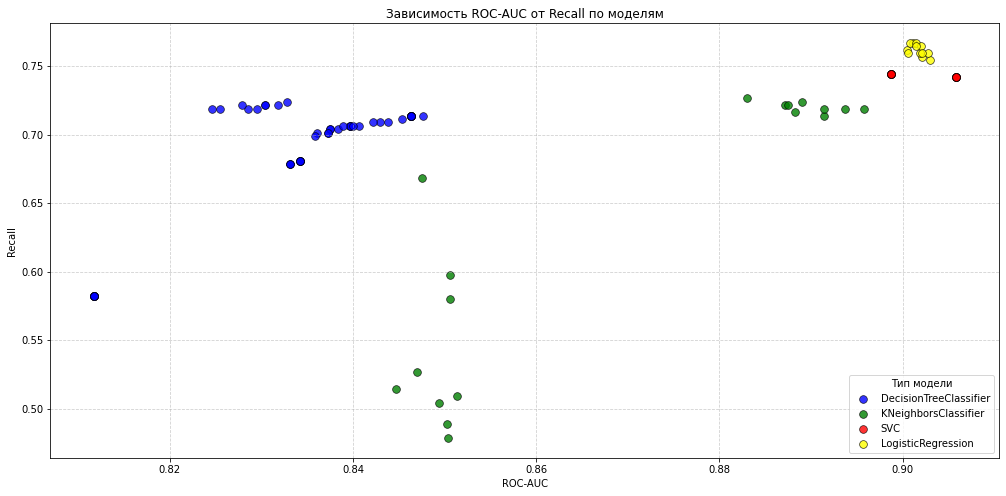

In [83]:
# Отобразим на графике зависимость метрик
plt.figure(figsize=(17, 8))

# Получаем модели и их имена
unique_models = cv_results['param_models'].unique()
model_names = [str(model).split('(')[0].strip() for model in unique_models]
colors = ['blue', 'green', 'red', 'yellow']

for i, model in enumerate(unique_models):
    model_mask = cv_results['param_models'] == model
    plt.scatter(cv_results.loc[model_mask, 'mean_test_roc_auc'], 
                cv_results.loc[model_mask, 'mean_test_recall'],
                alpha=0.8, s=60, c=[colors[i]], 
                label=model_names[i], edgecolors='black', linewidth=0.7)

plt.xlabel('ROC-AUC')
plt.ylabel('Recall')
plt.title('Зависимость ROC-AUC от Recall по моделям')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Тип модели', loc='lower right')
plt.show()

На графике очень наглядно представлены метрики качества для разных моделей. Лучшая метрика `recall` получились у модели `SVC`, но при этом значение метрики `roc_auc` не самое большое. Перебор выбранных гиперпараметров для модели `LogisticRegression` не сильно повлиял на метрики качества. Возможно, стоит рассмотреть другой набор гиперпараметров.

Проверим качество работы лучшей модели на тестовой выборке.

In [84]:
# Обучаем лучшую модель на тестовых данных
y_pred = gs.predict(X_test)

# Посчитаем вероятности предсказания классов на тестовых данных
y_proba = gs.predict_proba(X_test)[:,1]

In [85]:
# Ведедем значения метрик
print('='*30)
print('\033[1m' + 'Метрики качества лучшей модели' + '\033[0m')
print('\033[1m' + 'Recall:', round(recall_score(y_test, y_pred), 3), '\033[0m')
print('\033[1m' + 'Roc_auc:', round(roc_auc_score(y_test, y_proba), 3), '\033[0m')
print('='*30)

Метрики качества лучшей модели
Recall: 0.828 
Roc_auc: 0.905 


**Вывод по разделу 7**<br>
Для задачи классификации мы рассмотрели возможность применения 4 моделей классификации с разными гиперпарамтерами и способами масштабирования количественных признаков. Поиск лучшей модели выполняли с помошью функции `GridSearchCV`. Самой лучшей получилась модель линейной регрессии, и для этой модели показатели на тестовой выборке получились: `recall = 0.828`, а `roc_auc = 0.905`.<br>

Лучшая метрика `roc_auc` получилась у модели опорных векторов `SVC`. Показатели для этой модели получились: `recall = 0.74`, а `roc_auc = 0.915`. Показатель `roc_auc` немного выше, чем в лучшей модели, но выбор сделан в пользу наибольшего показателя `recall`.<br>

## Анализ важности признаков

Так как лучшей линейной моделью получилась логистическая регрессия, то для начала выведем коээфициенты для этой модели и построим для них график важности признаков.

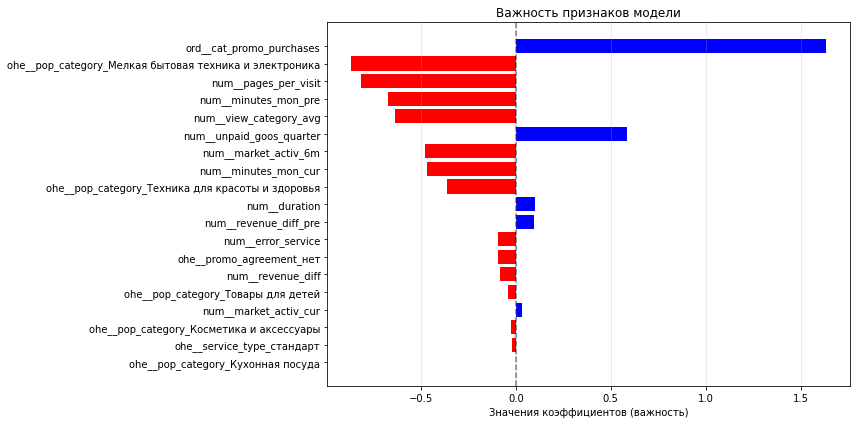

In [86]:
# Получаем коэффициенты и имена признаков
coef = gs.best_estimator_.named_steps['models'].coef_.flatten()
feature_names = gs.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

# Создаем DataFrame
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': coef,
    'abs_importance': np.abs(coef)
})

# Сортируем по важности
feature_importance = feature_importance.sort_values('abs_importance', ascending=True)

# Строим график
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'], 
         feature_importance['importance'],
         color=['red' if x < 0 else 'blue' for x in feature_importance['importance']])
plt.xlabel('Значения коэффициентов (важность)')
plt.title('Важность признаков модели')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Отрицательные значения коэффициентов говорят о том, что признак тянет предсказания к классу "0" ("Прежний уровень"), и чем выше коэффициент, тем выше сила этого притяжения. А положительные наоборот. Значения коэффициентов близкие к нулю указывают на то, что признак практически не влияет на предсказание.

Положительный коэффициент признака 'среднемесячная доля покупок по акции от общего числа покупок', говорит о том, что высокая доля покупок по акциям является показателем того, что маркетинговая активность снизилась. Этот показатель оказывает на модель самое большое влияние.

Отрицательное значение коэффициента признака 'маркетинговая активность за 6 мес' говорит о том, что чем выше маркетинговая активность, тем выше покупательская активность. Это как раз тот признак, на который может прямо влиять менеджемент магазина. Но тут есть еще один признак 'маркетинговая активность в текущем месяце', который практически не влияет на покупательскую активность. Скорее всего это происходит по причине того, что эти мероприятия имеют отложенный эффект. Также есть гипотеза, что в текущем месяце были проведены неэффективные коммуникации.

Положительное значение коэффициента признака 'число неоплаченных товаров в корзине' указывает на то, что высокое значение этого признака является сигналом о снижении покупательской активности.

Отрицательные значения коэффициентов признаков кол-ва посещенных страниц за визит, кол-во проведенных минут на сайте, среднее число просмотренных категорий за визит, являются следствием сниженной активности покупателей и по сути являются лишь сигналами о том, что активность клиента начинает снижаться. Но эти признаки не влияют на саму активность. Таким образом, эти признаки стоит использовать как метрики для отслеживания текущей активности покупателей, за которыми менеждемент магазина должен следить регулярно.

Коэффициент признака кол-ва сбоев сайта тоже отрицательный, то есть чем больше сбоев, тем выше активность. Очевидно, что не кол-во сбоев влияет на активность покупателей. Причина в том, что чем больше времени человек проводит на сайте (более активен), тем выше вероятность того, что он может столкнуться со сбоем в работе сайта.

**Построим график важности признаков с помощью метода SHAP**

Этот график более наглядно показывает как высокие или низкие значения признака влияют на предсказание отнесения объекта к любому из классов. Чтобы построить график, для начала нужно преобразовать входные признаки для тренировочной и тестовой выборки. Это можно сделать с помощью трансформера из пайплайна `data_preprocessor`.

In [87]:
# Преобразовываем входные признаки тренировочной выборки
X_train_p = pd.DataFrame(
    data_preprocessor.fit_transform(X_train),
    columns=data_preprocessor.get_feature_names_out()
)

# Преобразовываем входные признаки тестовой выборки
X_test_p = pd.DataFrame(
    data_preprocessor.transform(X_test),
    columns=data_preprocessor.get_feature_names_out()    
) 

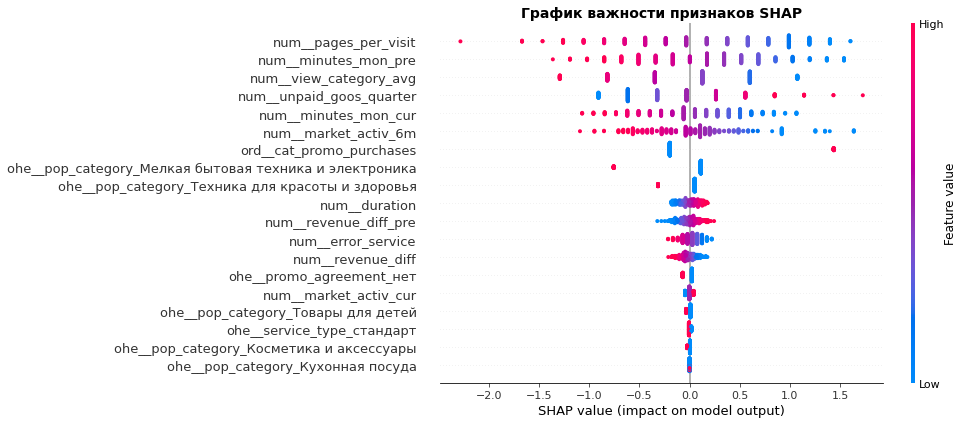

In [88]:
# Получаем модель из пайплайна
best_model = gs.best_estimator_.named_steps['models']

# Строим график
explainer = shap.LinearExplainer(best_model, X_train_p)
shap_values = explainer(X_test_p)
shap.plots.beeswarm(shap_values, max_display=19, plot_size=(14, 6), show=False)

# Добавляем заголовок
plt.title("График важности признаков SHAP", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Отрицательные значения значений shap говорят о том, что признак тянет предсказания к классу "0" ("Прежний уровень"), а положительные наоборот, к классу "1" ("Снизилась"). Чем больше по модулю значение shap, тем выше сила влияния этого признака на способность классификации. Наблюдения, которые плотно расположены около центральной оси указывают на то, что признак практически не влияет на предсказание. Красный цвет указывает на высокие значения признака, а синие на низкие значения.<br>
На первом признаке `pages_per_visit` (кол-во страниц за сеанс) видно, что чем выше значение признака (красный цвет), тем выше вероятность с точки зрения модели что в следующем месяце активность останется на прежнем уровне. Таким образом, внимание стоит уделить только первым восьми признакам.

На этом графике видно, что признаки, которые отражают поведение покупателя на сайте являются сигналами к снижению активности и имеют очень сильно влияние на способность модели предсказывать верный класс. А вот признак "маркетинговая активность за 6 мес" показывает, что высокая значение этого признака имеет значение shap около -1.0, а низкое ближе к 2.0. Это говорит о том, что низкая маркетнговая активность чуть более сильнее влияет на снижение покупательской активности.

**Теперь выпоним оценку важности признаков с помощью функции Permutation Importance**

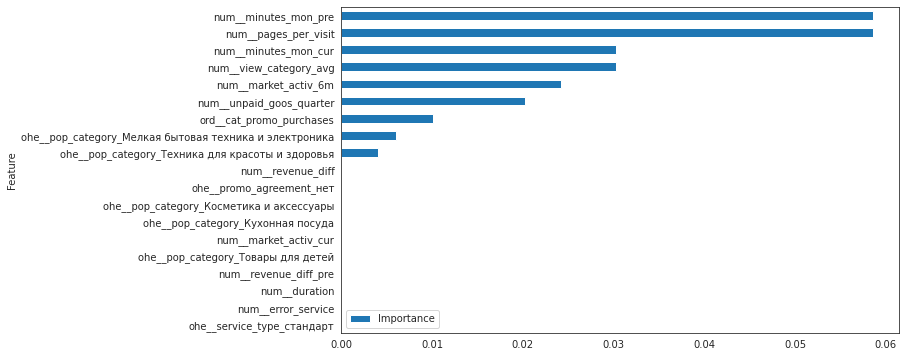

In [89]:
# Посмотрим важность признаков методом permutation_importance
best_model = gs.best_estimator_.named_steps['models']

# Запускаем расчет признаков важности на обработанных данных в трансформере
result_permutation = permutation_importance(best_model, X_test_p.values, y_test, scoring='recall')

# Сохраняем в датафрейм
feature_importance_permutation = pd.DataFrame({'Feature': feature_names, 'Importance': result_permutation['importances_mean']})
feature_importance_permutation = feature_importance_permutation.sort_values('Importance', ascending=True)

# Строим график
sns.set_style('white')
feature_importance_permutation.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

Важность признаков расположилась примерно в том же порядке, что и в других методах. За исключением одного признака `cat_promo_purchases`. Теперь он переместился с первого места на 6-ое.

**Вывод по разделу 8**<br>
Всего в модели получилось 7 важных признаков (которые встречаются в каждом методе оценки) из 19:<br>
* `pages_per_visit`
* `minutes_mon_pre`
* `unpaid_goos_quarter`
* `view_category_avg`
* `market_activ_6m`
* `minutes_mon_cur` 
* `promo_purchases`<br>

Из этих 7 признаков только `market_activ_6m` может прямо вляить на покупательскую активность. Остальные признаки относятся к поведению покупателя на сайте, и являются следствием снижения активности. Эти показатели можно использовать как индикаторы предсказывающие снижение покупательской активности. И таким образом, можно своевременно повышать маркетинговую активность.


## Сегментация покупателей

На этапе исследовательского анализа данных была выявлена группа покупателей, которые покупают товары из категории "Товары для детей" и имеют высокую вероятность снижения покупательской активности. По количеству покупателей это самый большой сегмент (более 25%), в котором выявлено снижение покупательной активности, по сравнению с другими сегментами (30% от всех покупателей с низкой активностью). Поэтому в первую очередь для увеличения покупательской активности стоит работать с этим сегментом. Работа с этим сегментом может принести наибольшие результаты при проведении маркетинговых мероприятий по повышению активности.<br>

Из раздела анализа признаков мы выявили, что на покупательскую способность более всего влияет маркетинговая активность. А показатели поведения показателя на сайте является сигналами снижения покупательской активности. Возомжно, что если удастся завлечь покупателя проводить больше времени на сайте и посещать большее кол-во страниц за сеанс, то это может повысить покупательскую активность.

Добавим информацию о прибыли по каждому клиенту в осоновную таблицу.

In [90]:
#Устанавливаем id в качестве индекса
money = money.set_index('id')
# Объединение по индексу датафреймов market и money
market = market.join(money, how='inner')

In [91]:
# Проверим результат объединения
market.sample(2)

,activity,service_type,promo_agreement,market_activ_6m,market_activ_cur,duration,promo_purchases,pop_category,view_category_avg,unpaid_goos_quarter,error_service,pages_per_visit,revenue_mon_pre,revenue_mon_pre_pre,revenue_mon_cur,minutes_mon_pre,minutes_mon_cur,revenue_diff_pre,revenue_diff,cat_promo_purchases,id,profit
id,,,,,,,,,,,,,,,,,,,,,,
216582,Прежний уровень,стандарт,да,5.2,4,594,0.21,Товары для детей,5,4,4,7,5051.0,5234.0,5339.6,15,20,-183.0,288.6,Низкая_доля,216582,4.78
216221,Прежний уровень,стандарт,да,3.3,5,245,0.30,Домашний текстиль,6,5,2,7,5884.0,4384.0,7314.0,14,15,1500.0,1430.0,Низкая_доля,216221,3.23


Создадим отдельный датафрейм с выбранным сегментом.

In [92]:
# Выделим сегмент в отдельный датафрейм
market_seg = market.query("pop_category=='Товары для детей'").copy()

Перед анализом сегмента отобразим первые 7 признаков признаков в порядке убывания их важности.<br>
* `pages_per_visit` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
* `minutes_mon_pre` — значение времени, проведённого на сайте, в минутах (за предыдущий месяц).<br>
* `unpaid_goos_quarter` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `view_category_avg` — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `market_activ_6m` — среднемесячное кол-во маркетинговых коммуникаций (контактов) с покупателем за последние 6 месяцев.
* `minutes_mon_cur` — значение времени, проведённого на сайте, в минутах (за текущий месяц).<br>
* `promo_purchases` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

Посмотрим как будет выглядеть распределение важных признаков для в разрезе активности.<br>
Для этого создадим функцию, которая будет строить графики распределения.

In [93]:
# Создаем функцию для построенния графика респределения выбранного признака
def plot_activity (feature, feature_name, bins):
    
    # Задаем размеры графика
    plt.figure(figsize=(10, 5))

    # Первая гистограмма
    market_seg.query("activity=='Прежний уровень'")[feature].hist(
        bins=bins, edgecolor='black', grid=False,
        label='Прежний уровень')
    
    # Вторая гистограмма
    market_seg.query("activity=='Снизилась'")[feature].hist(
        bins=bins, edgecolor='black', grid=False, alpha=0.6,
        label='Снизилась')
    
    # Добавляем легенду и подписи
    plt.legend(title='Активность')
    plt.title(f"Гистограмма распределения признака '{feature_name}'")
    plt.xlabel(feature_name)
    plt.ylabel('Частота встречаемости значений')
    plt.show()

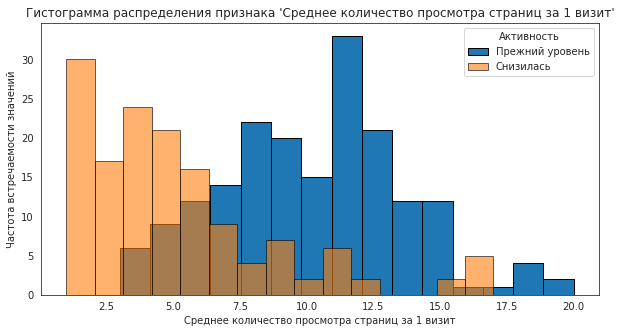

In [94]:
# Строим график распределения среднего количества просмотра страниц за 1 визит
plot_activity('pages_per_visit', 'Среднее количество просмотра страниц за 1 визит', 15)

На гистограмме видно, что у большей части покупателей с низкой активностью, среднее кол-во просмотренных за сеанс страниц менее 7,5. Это показатель лучше использовать для регулярного мониторинга. Если у покупателя этот показатель начинает опускаться ниже 7.5, то следует предпринять какие-то меры, чтобы повысить их активность.
___

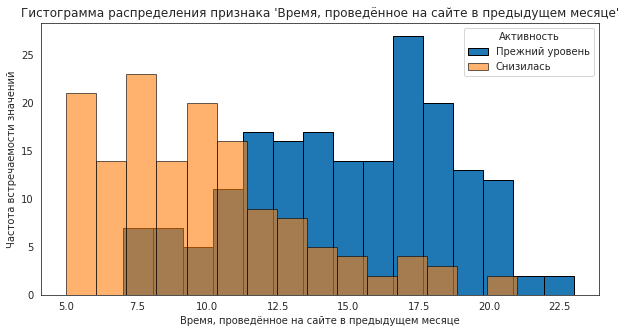

In [95]:
# Строим график распределения времени, проведённого на сайте в предыдущем месяце
plot_activity('minutes_mon_pre', 'Время, проведённое на сайте в предыдущем месяце', 15)

На гистограмме видно, что у большей части покупателей с низкой активностью, время проведеное на сайте менее 12 минут. Это показатель тоже можно использовать для регулярного мониторинга активности. Нужно учитывать, что показатель постфактум, и на него уже никак нельзя повлиять. Этих покупателей нужно выделить в отдельный маркетинговый сегмент и начать с ними проводить маркетинговые коммуникации. Так как показатель маркетинговых коммуникаций может прямо повлиять на активность.
___

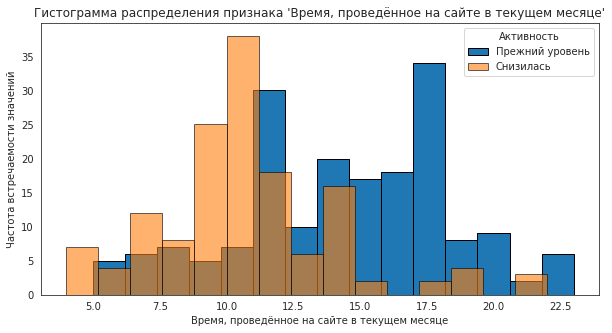

In [96]:
# Строим график распределения времени, проведённого на сайте в текущем месяце
plot_activity('minutes_mon_cur', 'Время, проведённое на сайте в текущем месяце', 15)

На гистограмме видно, что у большей части покупателей с низкой активностью, время проведеное на сайте менее 12 минут. Это показатель тоже можно использовать для регулярного мониторинга активности. Если у покупателя этот показатель начинает опускаться ниже 12 минут, то следует предпринять какие-то меры, чтобы повысить активность таких покупателей. Этот показатель можно отслеживать накоплением в течение месяца, и уже к концу месяца будет понятно у каких покупателей начинает снижаться активность.
___

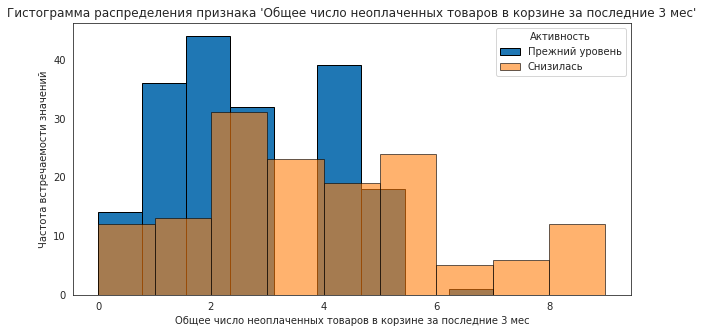

In [97]:
# Строим график распределения общего числа неоплаченных товаров в корзине за последние 3 мес
plot_activity('unpaid_goos_quarter', 'Общее число неоплаченных товаров в корзине за последние 3 мес', 9)

На этой гистограмме видно, что у большей части покупателей с низкой активностью, количество неоплаченных товаров в корзине более 3-х. Работа с брошенными корзинами важна для любой категории покупателей. Но тут можно отслеживать потенциальных покупателей с понижением активности по другим показателям (время и кол-во страниц на сайте), и с этим сегментом работать по брошенным корзинам отдельно. Например, предлагать дополнительные условия оплаты, доставки или скидки.
___

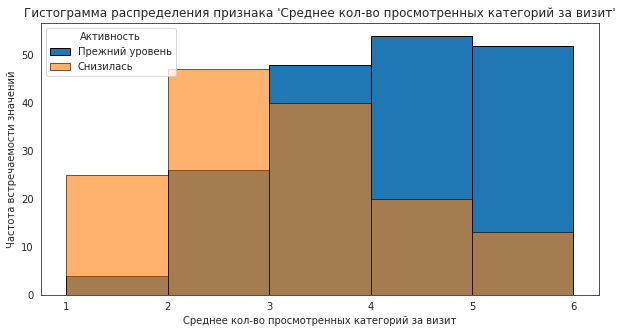

In [98]:
# Строим график распределения среднего количества просмотренных категорий за визит в течение последнего месяца
plot_activity('view_category_avg', 'Среднее кол-во просмотренных категорий за визит', 5)

На этой гистограмме видно, что у большей части покупателей с низкой активностью, количество просмотренных категорий за сеанс значительно меньше. Пограничным значением является 3 категории. Если у покупателя этот показатель равен 3 или меньше, то с этой категорией покупателей можно провести дополнительные маркетинговые коммуникации. Например, предложить товары из других непосещенных категорий.
___

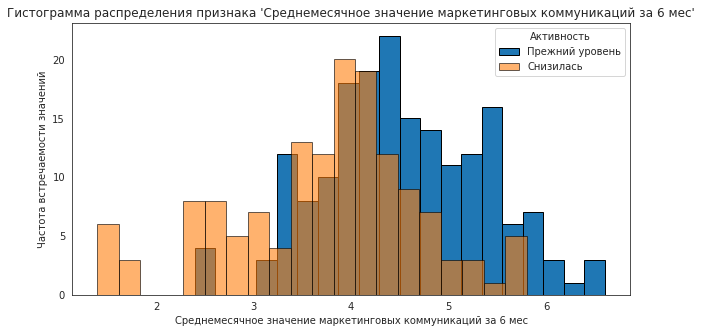

In [99]:
# Строим график распределения маркетинговой активности за 6 мес
plot_activity('market_activ_6m', 'Среднемесячное значение маркетинговых коммуникаций за 6 мес', 20)

На этой гистограмме видно, что у большей части покупателей с прежним уровнем активности, количество среднемесячных маркетинговый коммуникаций немного выше. Если этот показатель будет менее 4 на протяжении полугода, то высока вероятность, что такой покупатель снизит свою активность. Но в этом диапазоне также многопокупателей и спрежней активностью. Если значение средемесячных маркетинговых коммуникации выше 5, то покупателей с низкой активностью почти нет. На графике распределения SHAP этот показатель как раз отражает поведение этого признака: высокая значение этого признака имеет значение shap около -5.0, а низкое ближе к 7.5. Этот небольшой дисбаланс shap и наложение объектов на гистоограмме около значения 4 объясняется тем, что низкая маркетнговая активность чуть более сильнее влияет на снижение покупательской активности.
___

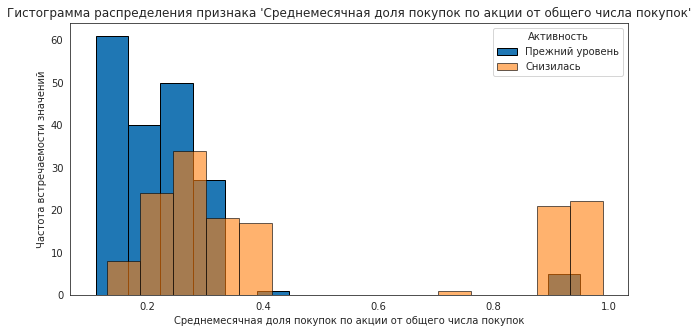

In [100]:
# Строим график распределения среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев
plot_activity('promo_purchases', 'Cреднемесячная доля покупок по акции от общего числа покупок', 15)

На этой гистограмме видно, что у большей части покупателей с низкой активностью, среднемесячная доля покупок по акции от общего числа покупок почти всегда выше значения 0,3. Это говорит о том, что такие покупатели продолжают делать покупки на сайте, но только по акции.
___

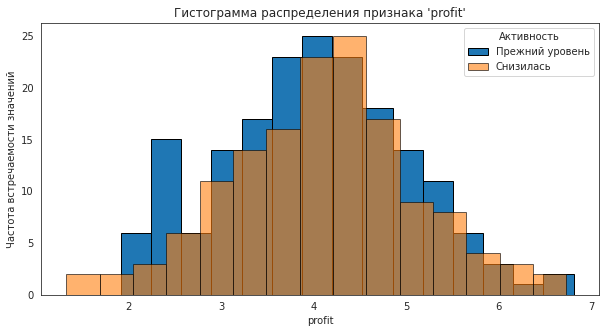

In [101]:
# Строим график распределения среднемесячной доли покупок по акции от общего числа покупок за последние 6 месяцев
plot_activity('profit', 'profit', 15)

На этой гистограмме видно, что прибыль от обоих категорий примерно одинакова. Но зато, у покупателей с прежним уровнем активности она не бывает ниже 2-х у.е. Посчитаем средние значения прибыли для обоих категорий.

In [102]:
# Считаем среднюю прибыль с одного покупателя за 3 месяца
print('\033[1m' + 'Средняя прибыль с одного покупателя (Прежний уровень) за 3 месяца',
      round(market_seg.query("activity=='Прежний уровень'")['profit'].mean(), 3), 'у.е.' + '\033[0m')
print('\033[1m' + 'Средняя прибыль с одного покупателя (Снизилась) за 3 месяца',
      round(market_seg.query("activity=='Снизилась'")['profit'].mean(), 3), 'у.е.' + '\033[0m')


Средняя прибыль с одного покупателя (Прежний уровень) за 3 месяца 4.002 у.е.
Средняя прибыль с одного покупателя (Снизилась) за 3 месяца 4.095 у.е.


У покупателей с низкой активностью прибыль даже немного выше. Возможно, это причине дополнительных расходов на маркетинговые коммуникации, если прибыль считается с учетом этих расходов. Тогда возникает вопрос к эффективности таких маркетинговый коммуникаций. Нужно более детально считать привлечение и удержание клиентов.<br>

Посмотрим какая будет средняя выручка с одного клиента.

In [103]:
# Посчитаем общую выручку за 3 месяца в отдельный столбец
# market_seg['revenue_total'] = market_seg[['revenue_mon_pre_pre', 'revenue_mon_pre', 'revenue_mon_cur']].sum(axis=1)
market_seg['revenue_total'] = market_seg.filter(like='revenue_mon').sum(axis=1)

In [104]:
# Считаем среднюю выручку с одного покупателя за 3 месяца
print('\033[1m' + 'Средняя выручка с одного покупателя (Прежний уровень) за 3 месяца',
      round(market_seg.query("activity=='Прежний уровень'")['revenue_total'].mean(), 2), 'у.е.' + '\033[0m')
print('\033[1m' + 'Средняя выручка с одного покупателя (Снизилась) за 3 месяца',
      round(market_seg.query("activity=='Снизилась'")['revenue_total'].mean(), 2), 'у.е.' + '\033[0m')

Средняя выручка с одного покупателя (Прежний уровень) за 3 месяца 14806.61 у.е.
Средняя выручка с одного покупателя (Снизилась) за 3 месяца 14300.29 у.е.


У покупателей с низкой активностью среднемесячная выручка ниже примерно на 4%, но при этом среднемесячная прибыль с однго покупателя немного выше. Это должно стать отдельной темой дополнительного исследования эффективности маркетинговых коммуникации или экономики торговых операций (стоимость закупки товара, обслуживания, хранения, упаковки, доставки, возврата и т.д)., чтобы понять причину такого дисбаланса.
___

**Выводы и предложения по разделу 9**<br>
Для сегмента покупателей, которые покупают товары из категории "Товары для детей" и имеют высокую вероятность снижения покупательской активности рекомендуется в первую очередь повысить показатель среднемесячного кол-ва маркетинговых коммуникаций. Но при этом нужно оценивать стоимость увеличения таких коммуникаций и соотносить их с прибылью.<br>

В первую очередь нужно повысить маркетинговую коммуникацию с теми клиентами, у которых есть брошенные товары, этих клиентов быстрее всего привести к покупке. Например, можно разослать промокоды на скидку.<br>

В категории "Товары для детей" обычно чаще всего покупают женщины в возрасте 25-45 лет. Поэтому для этой категории покупателей могут быть интересны и другие категории товаров, например, "Косметика и аксессуары", "Товары для красоты", "Товары для дома" или "Товары для животных". Категории нужно предлагать только те, которые не просматриваись.<br>

Также можно попробовать увеличить покупательскую активность с помощью увеличения времени на сайте или увеличения просмотра страниц. Например, рекомендация товаров при просмотре других категорий или интересующих товаров. Это может потребовать доработки сайта. Также создание каких-то конкурсов или игровых механик (при просмотре товаров), повышающих вовлеченность покупателей.<br>

В популярной категории "Товары для детей" можно расширить ассортимент товаров. Если покупатель чаще всего покупает товары в этой категории, то ему могут быть интересны и другие товары из этой категории.<br>

В качестве критериев для прогнозирования и отслеживания покупателей, у которых покупательная активность может снизиться нужно отслуживать показатели поведения на сайте: кол-во страниц за сеанс, время на сайте за сеанс, среднее кол-во просмотренных категорий за сеанс. Снижение этих показателей может сигнализировать о том, что покупателькая активность начинает снижаться.
___

## Общий вывод по проекту

Интернет-магазин «В один клик» столкнулся со снижением активности покупателей и стоит задача удержать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений. Поэтому была разработана  модель, которая определяет покупателей у которых есть высокая вероятность снижения покупательской активности. Этим покупателям затем будут формироваться персональные предложения, чтобы увеличить их покупательскую активность.
Для создания модели и анализа было использвано 4 датасета с данными от магазина:
1. `market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. Содержит 1300 строк (данные о 1300 покупателях), явных пропусков нет. Все количественные признаки имеют соответсвующий формат `int64` или `float64`.<br>
2. `market_money.csv` - данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. Содержит 3900 строк (данные о выручке по каждому покупателю за последние 3 месяца помесячно), при этом данные о выручке по каждому месяцу хранятся в одном столбце. Явных пропусков нет. Признак `revenue` имеет соответсвующий формат `float64`.<br>
3. `market_time.csv` - данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. Содержит 2600 строк (данные о времени, проведенном покупателем на сайте за последние 2 месяца), при этом данные о времени по каждому месяцу хранятся в одном столбце. Явных пропусков нет. Признак `minutes` имеет целочисленный формат `int64`.<br>
4. `money.csv` - данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. Содержит 1300 строк (данные о выручке с каждого клиента сводно за последние 3 месяца ). Явных пропусков нет. Признак `profit` имеет соответсвующий формат `float64`.<br>

* Во всех датафреймах пропущенных значений не обнаружено.
* Во всех датафреймах поле с номером кпокупателя `id` уникально, дубликатов не выявлено.
* В датафрейме `market_file` в столбце `service_type` были обнаружены и обработаны неявные дубликаты: ошибочные значения названия категории "стандартт". Высего было обработано 10 таких строк. В остальных датафреймах дубликатов не обнаружено. Были также исправлены орфографические ошибки в наименовании категорий.<br>
___

**Вывод по исследовательскому анализу данных**<br>

*Датасет `market_file`*<br>
* Наблюдается незначительный дисбаланс классов в целевом признаке (61.7% / 38.3%). Применение каких-то методов обработки дисбаланса не потребовалось.
* По типу подписки преобладают покупатели с типом "стандарт" (71.1%). Доля покупателей с подпиской "премиум" - 28.9%
* Согласие на рассылку дополнительных (акционных) предложений товаров подписали 74% покупателей, это почти 3/4 от всех покупателей.
* В выборке представлено 6 популярных категорий товаров. Самая популярная категория "Товары для детей" - 25.4%. Наименее популярная категория торовав - "Кухонная посуда".
* В абсолютном выражении наибольшее снижение активности выявлено среди покупателей с типом подписки "Стандарт". В долевом выражении снижение активности чаще встречается среди покупателей с типом подписки "Премиум" (45%). У покупателей с типом подписки "Стандарт" снижение активности выявлено у 35% покупателей.
* В абсолютном выражении наибольшее снижение активности наблюдается у покупателей, которые чаще всего покупали товары в категории "Товары для детей". Также значительное снижение активности наблюдается в категориях "Косметика и аксессуары" и "Домашний текстиль". Если же смотреть в относительном выражении, то наиболее всего снижение активности у покупателей из категорий: "Косметика и аксессуары", "Кухонная посуда", "Товары для детей.<br>

*Датасет `market_money`*<br>
* Есть небольшой прирост выручки от месяца к месяцу. Однако, несмотря на общий рост выручки по всем покупателм, наблюдается существенноне снижение уровня активности. Данные по выручке распределены нормально.<br>

*Датасет `market_time`*<br>
* Есть незначительное снижение общего времени проведенного на сайте всеми клиентами. Возможно, это снижение имеет связь со снижением уровня активности покупателей. Несмотря на рост выручки в текущем месяце, время проведенное покупателями на сайте снизилось. Данные о времени проведенном на сайте распределены нормально.<br>

*Датасет `money`*<br>
* Данные о прибыльности покупателей распределены нормально. Выбросов нет.<br>

После исследовательского анализа таблицы были объединены в одну.
___

**Вывод по корреляционному анализу**<br>

Анализ корреляции проводился с помощью матрицы корреляции `phik`.<br>

* Самую высокую корреляцию с целевым признаком имеет признак "Кол-во страниц за визит" pages_per_visit - 0.75.
* Умеренную корреляцию с целевым признаком имеют признаки: `minutes_mon_pre`, `minutes_mon_cur`, `market_activ_6m`, `view_category_avg`, `unpaid_goos_quarte`, `promo_purchases`.
* Между некоторыми входными признаками тоже имеется умеренная связь: между `revenue_mon_pre_pre` и `promo_purchases`, а также между `revenue_mon_pre_pre` и `revenue_mon_pre`.
* На основании признаков `revenue_mon_pre_pre`, `revenue_mon_pre` и `revenue_mon_cur` созданы два новых: разница в выручке предыдущего и препредыдущего месяцев, и разница в выручке предыдущего и текущего месяцев. Изменение динамики в выручке может лучше показывать изменения в уровне активности покупателей.
* Линейной зависимости между входными признаками не обнаружено.
* Мультиколлинеарности между признаками не наблюдается.
* Есть входные признаки (`promo_agreement`, `market_activ_cur`, `revenue_diff`), которые имеют нулевой коэффициент корреляции с целевым.
___

**Выбор лучшей модели классификации**<br>

По условиям задания нужно было выявить как можно больше покупателей, у которых есть высокая вероятность снижения покупательской активности. Таким образом, нам нужно как можно чаще предсказывать класс 1 (покупательская активность снизилась). Для этого была выбрана метрика `recall`. В качестве дополнительной использовалась метрика `roc_auc`, чтобы оценивать общую предсказывающую способность модели.

Для задачи классификации были рассмотрены возможность применения 4 моделей классификации с разными гиперпарамтерами  и способами масштабирования количественных признаков (`DecisionTreeClassifier`, `LogisticRegression`, `KNeighborsClassifier` и `SVC`). Поиск лучшей модели выполнялся с помошью функции `GridSearchCV`. Самой лучшей функций получилась модель логистической регрессии, для этой модели показатели: `recall = 0.77`, а `roc_auc = 0.9022`.<br>

Лучшая метрика `roc_auc` получилась у модели опорных векторов `SVC`. Показатели для этой модели получились: `recall = 0.751`, а `roc_auc = 0.915`. При этом показатель `roc_auc` не сильно ниже.<br>

Был выбрана модель логистической регрессии в пользу более высокого показателя `recall`. В дальнейшем для этой модели можно настроить пороги классификации, чтобы еще улучшить показатель `recall`. Чтобы определить баланс между `recall` и `roc_auc`, нужно знать дполнительные затраты на маркетинговую активность.
___

**Анализ важности признаков лучшей модели**<br>

В модели получилось 7 важных признаков из 15 (в порядке убывания важности):<br>
* `pages_per_visit`
* `minutes_mon_pre`
* `unpaid_goos_quarter`
* `view_category_avg`
* `market_activ_6m`
* `minutes_mon_cur` 
* `promo_purchases`<br>

Из этих 7 признаков только `market_activ_6m` может прямо вляить на покупательскую активность. Остальные признаки относятся к поведению покупателя на сайте, и являются следствием снижения активности. Эти показатели можно использовать как индикаторы предсказывающие снижение покупательской активности.
___

**Предложения и рекомендации по повышению активности постоянных покупателей**<br>

Для сегмента покупателей, которые покупают товары из категории "Товары для детей" и имеют высокую вероятность снижения покупательской активности рекомендуется в первую очередь повысить показатель среднемесячного кол-ва маркетинговых коммуникаций. Но при этом нужно оценивать стоимость увеличения таких коммуникаций и соотносить их с прибылью.<br>

В первую очередь нужно повысить маркетинговую коммуникацию с теми клиентами, у которых есть брошенные товары, этих клиентов быстрее всего привести к покупке. Например, можно разослать промокоды на скидку.<br>

В категории "Товары для детей" обычно чаще всего покупают женщины в возрасте 25-45 лет. Поэтому для этой категории покупателей могут быть интересны и другие категории товаров, например, "Косметика и аксессуары", "Товары для красоты", "Товары для дома" или "Товары для животных". Категории нужно предлагать только те, которые не просматриваись.<br>

Также можно попробовать увеличить покупательскую активность с помощью увеличения времени на сайте или увеличения просмотра страниц. Например, рекомендация товаров при просмотре других категорий или интересующих товаров. Это может потребовать доработки сайта. Также создание каких-то конкурсов или игровых механик (при просмотре товаров), повышающих вовлеченность покупателей.<br>

В популярной категории "Товары для детей" можно расширить ассортимент товаров. Если покупатель чаще всего покупает товары в этой категории, то ему могут быть интересны и другие товары из этой категории.<br>

В качестве критериев для прогнозирования и отслеживания покупателей, у которых покупательная активность может снизиться нужно отслуживать показатели поведения на сайте: кол-во страниц за сеанс, время на сайте за сеанс, среднее кол-во просмотренных категорий за сеанс. Снижение этих показателей может сигнализировать о том, что покупателькая активность начинает снижаться.
___